# <font color=blue>Telecom Churn Prediction Group Case Study</font>

In [2]:
#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Libraries
import pandas as pd
#Importing Miscellaneous Libraries
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

#Importing Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve, RocCurveDisplay
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# Other sklearn packages
import sklearn.metrics as metrics
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

## Libraries for KMeans clustering ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing required packages for visualization
from IPython.display import Image
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.svm import SVC

In [77]:
# Checking versions of Libraries
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.23.5 | Pandas version: 1.5.3 | Seaborn version: 0.12.2'

# Step 1 - Data Understanding, Preparation, and Pre-Processing

In [4]:
churn = pd.read_csv("train.csv")
churn.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability
0   0        109            0.00            0.00            0.00            6/30/2014            7/31/2014            8/31/2014   31.28   87.01    7.53        48.58       124.38         1.29         32.24         96.68          2.33           0.00           0.00           0.00           0.00           0.00           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61              0.00              0.00              0.00              0.00              0.00              0.00              0.00         65.09        204.99          1.01          0.00          0.00          0.00          8.20          0.63          0.00         0.38         0.00         0.00           81.21          221.68            3.63              2.43              3.68              7.79              0.83             21.08             16.91              0.00              0.00              0.00          3.26         24.76         24.71              0.00              7.61              0.21              7.46

In [5]:
print(churn.shape)
print(churn.duplicated().sum())
churn.describe().round(1)

(69999, 172)
0


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8      aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability
count 69999.00   69999.00        69297.00        69297.00        69297.00 69999.00 69999.00 69999.00     67231.00     67312.00     66296.00      67231.00      67312.00      66296.00       67231.00       67312.00       66296.00       67231.00       67312.00       66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00      67231.00      67312.00      66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00      67231.00      67312.00      66296.00      67231.00      67312.00      66296.00      67231.00      67312.00      66296.00     67231.00     67312.00     66296.00        69999.00        69999.00        69999.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00      67231.00      67312.00      66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00          67231.00          67312.00          66296.00      67231.00      67312.00      66296.00        69999.00        69999.00        69999.00      672

# Data pre-processing and preparation

In [6]:
# While all other columns have utilised the integers "6,7,8,9" to indicate month name, certain columns representing volume-based users have month specified in their names.
alphabetic_month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']
churn = churn.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6'})

#Convert AON to Months
churn['aon'] = round((churn['aon']/365),1)

age_range = [ 0,  2,  4,  6,  8, 10, 12]
age_bin = [ 1, 2, 3, 4, 5, 6]
churn['age_group'] = pd.cut(churn['aon'], age_range, labels=age_bin)
churn['age_group'] = churn['age_group'].astype(str)
    
# Converting the date columns to date time-dataframe
date_columns= [column for column in churn.columns if 'date' in column]
for i in churn[date_columns]:
    churn[i] = pd.to_datetime(churn[i])

# Let us create a seperate category for categorical columns
categorical_columns = []
for i in churn.columns:
    if churn[i].nunique()==2:
        categorical_columns.append(i)

categorical_columns.append('age_group')
categorical_columns.remove('churn_probability')

# Missing value imputation

In [7]:
# imputing null values if date columns
# for  train dataset
for i in ('date_of_last_rech_6','date_of_last_rech_data_6'):
    churn[i]=churn[i].fillna('06/30/2014')
for i in ('date_of_last_rech_7','date_of_last_rech_data_7','last_date_of_month_7'):
    churn[i]=churn[i].fillna('07/31/2014')
for i in ('date_of_last_rech_8','date_of_last_rech_data_8','last_date_of_month_8'):
    churn[i]=churn[i].fillna('08/31/2014')
churn.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  3g_vbc_8  3g_vbc_7  3g_vbc_6  churn_probability age_group
0   0        109            0.00            0.00            0.00           2014-06-30           2014-07-31           2014-08-31   31.28   87.01    7.53        48.58       124.38         1.29         32.24         96.68          2.33           0.00           0.00           0.00           0.00           0.00           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61              0.00              0.00              0.00              0.00              0.00              0.00              0.00         65.09        204.99          1.01          0.00          0.00          0.00          8.20          0.63          0.00         0.38         0.00         0.00           81.21          221.68            3.63              2.43              3.68              7.79              0.83             21.08             16.91              0.00              0.00              0.00          3.26         24.76         24.71              0.00              7.61              0.21              7

In [8]:
nullval = pd.DataFrame()
nullval['Features'] = churn.columns
nullval['% Null in feature'] = [round((churn[i].isnull().sum()/len(churn[i].index))*100,2) for i in churn.columns]
null_feature_list =nullval['Features'][nullval["% Null in feature"]!=0].tolist()
print(nullval.sort_values(by = "% Null in feature", ascending = False))

                     Features  % Null in feature
125           max_rech_data_6              74.90
164                 fb_user_6              74.90
149          night_pck_user_6              74.90
134        av_rech_amt_data_6              74.90
122         total_rech_data_6              74.90
146                 arpu_2g_6              74.90
131           count_rech_3g_6              74.90
143                 arpu_3g_6              74.90
128           count_rech_2g_6              74.90
150          night_pck_user_7              74.48
165                 fb_user_7              74.48
129           count_rech_2g_7              74.48
147                 arpu_2g_7              74.48
126           max_rech_data_7              74.48
132           count_rech_3g_7              74.48
123         total_rech_data_7              74.48
135        av_rech_amt_data_7              74.48
144                 arpu_3g_7              74.48
145                 arpu_3g_8              73.69
124         total_re

In [9]:
# Let us observe missing values in recharge columns 
rech_col = [i for i in churn.columns if 'rech' in i]
rech_6_col = [i for i in rech_col if '6' in i]
rech_7_col = [i for i in rech_col if '7' in i]
rech_8_col = [i for i in rech_col if '8' in i]

In [10]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_col_6 = pd.DataFrame(churn[rech_6_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = churn[["vol_2g_mb_6",'vol_3g_mb_6']]
rech_col_6 = pd.concat([rech_col_6,vol_col], axis = 1) 
rech_col_6.head(10)

total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6 date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  vol_2g_mb_6  vol_3g_mb_6
0                 3                77              65          2014-06-22               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
1                 3                 0               0          2014-06-12               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
2                 2                70              70          2014-06-11               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
3                 2               160             110          2014-06-15               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
4                13               290              50          2014-06-25               2014-06-25               7.00            25.00             7.00             0.00              175.00       390.80         0.00
5                 9               100              30          2014-06-30               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
6                 3               130             110          2014-06-29               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
7                 2               198             198          2014-06-20               2014-06-20               1.00           198.00             1.00             0.00              198.00       167.53       177.90
8                 2               200             200          2014-06-28               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
9                 4               128             128          2014-06-27               2014-06-30                NaN              NaN              NaN              NaN                 NaN         0.00         0.00

In [11]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_col_7 = pd.DataFrame(churn[rech_7_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = churn[["vol_2g_mb_7",'vol_3g_mb_7']]
rech_col_7 = pd.concat([rech_col_7,vol_col], axis = 1) 
rech_col_7.head(10)

total_rech_num_7  total_rech_amt_7  max_rech_amt_7 date_of_last_rech_7 date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  vol_2g_mb_7  vol_3g_mb_7
0                 2                65              65          2014-07-10               2014-07-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
1                 4               145             145          2014-07-10               2014-07-08               1.00           145.00             0.00             1.00              145.00       352.91         3.96
2                 4               120              70          2014-07-22               2014-07-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
3                 4               240             110          2014-07-21               2014-07-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
4                10               136              41          2014-07-26               2014-07-23               7.00            41.00             6.00             1.00              191.00       308.89         0.00
5                 8                90              30          2014-07-27               2014-07-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
6                 2                 0               0          2014-07-19               2014-07-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
7                 3               198             198          2014-07-22               2014-07-22               1.00           198.00             1.00             0.00              198.00         6.29       151.58
8                 3                 0               0          2014-07-30               2014-07-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
9                 3               160             110          2014-07-16               2014-07-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00

In [12]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_col_8 = pd.DataFrame(churn[rech_8_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = churn[["vol_2g_mb_8",'vol_3g_mb_8']]
rech_col_8 = pd.concat([rech_col_8,vol_col], axis = 1) 
rech_col_8.head(10)

total_rech_num_8  total_rech_amt_8  max_rech_amt_8 date_of_last_rech_8 date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8
0                 2                10              10          2014-08-24               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
1                 5                50              50          2014-08-26               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
2                 2                 0               0          2014-08-24               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
3                 3               130              50          2014-08-25               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
4                 8               122              30          2014-08-30               2014-08-20               6.00            25.00             6.00             0.00              142.00       213.47         0.00
5                10               100              30          2014-08-28               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
6                 3               130             130          2014-08-26               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
7                 2               198             198          2014-08-28               2014-08-20               1.00           198.00             1.00             0.00              198.00         5.40       271.40
8                 1               150             150          2014-08-19               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00
9                 2               279             149          2014-08-28               2014-08-31                NaN              NaN              NaN              NaN                 NaN         0.00         0.00

#### As shown in the above table, anytime the total reacharge data is NaN, the values for max rech, count rech, average amount reacharge data, 2g, and 3g are also all missing. This confirms that there is no mobile internet consumption (2G or 3G data) associated with these numbers. Let's therefore assume that these consumers did not perform any recharges and so replace these missing values with zero.

In [13]:
## Let's replace the empty values in these recharge columns with zeros.

impute_0 = ['total_rech_data_6', 'max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6',
           'total_rech_data_7', 'max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7',
           'total_rech_data_8', 'max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8',]

churn[impute_0] =  churn[impute_0].apply(lambda x: x.fillna(0))

In [14]:
num_cols = [column for column in churn.columns if column not in impute_0 + date_columns + categorical_columns]
print(len(num_cols))

nullval = pd.DataFrame()
nullval['Features'] = num_cols
nullval['% Null in feature'] = [round((churn[i].isnull().sum()/len(churn[i].index))*100,2) for i in num_cols]
nullval['Minimum'] =[churn[i].min() for i in num_cols]
nullval['Maximum'] =[churn[i].max() for i in num_cols]
null_feature_list =nullval['Features'][nullval['% Null in feature']!=0].tolist()
null_feature_list_imp_0 =nullval['Features'][(nullval['% Null in feature']<70) & (nullval['% Null in feature']>0)].tolist()
print(nullval.sort_values(by = "% Null in feature", ascending = False))

142
               Features  % Null in feature  Minimum  Maximum
119           arpu_3g_6              74.90   -20.38  5054.37
122           arpu_2g_6              74.90   -35.83  5054.35
120           arpu_3g_7              74.48   -26.04  4980.90
123           arpu_2g_7              74.48   -13.09  4809.36
121           arpu_3g_8              73.69   -24.49  3716.90
124           arpu_2g_8              73.69   -55.83  3483.17
88         std_ic_mou_8               5.29     0.00  5658.74
34         loc_og_mou_8               5.29     0.00 11039.91
58          og_others_8               5.29     0.00   394.93
94         spl_ic_mou_8               5.29     0.00    16.86
28     loc_og_t2f_mou_8               5.29     0.00   588.29
55         spl_og_mou_8               5.29     0.00  1075.08
31     loc_og_t2c_mou_8               5.29     0.00   351.83
82     std_ic_t2f_mou_8               5.29     0.00  1394.89
37     std_og_t2t_mou_8               5.29     0.00  8014.43
52         isd_og_mo

### Since the null values in the variables like arpu_2g, arpu_3g for month of 6, 7 and 8 are >40%, we can delete these columns.

In [15]:
churn = churn.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8'], 1)

### The users with minimum value of '0' in the remaining numerical features with null value <70 and >0 implies that there is no incoming/outgoing calls (local/std/isd) made to T2T/T2T/T2M/T2O/T2F/T2C/ONNET/OFFNET operators. So, we can impute these missing values in the variables with '0'.

In [16]:
churn[null_feature_list_imp_0] = churn[null_feature_list_imp_0].fillna(0)

### Also, after imputing the missing values with '0', we observe that few variables i.e., std_ic_t2o_mou_6, std_og_t2c_mou_6, std_ic_t2o_mou_7, std_og_t2c_mou_7, std_og_t2c_mou_8, std_ic_t2o_mou_8 turn into single unique value i.e.,  '0'. So, we can delete these features as it is not useful to the build the model due to zero variance init.

### Similarly, from the given data, we can observe that four columns i.e., 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou' and 'loc_ic_t2o_mou' has single unique value i.e., '0'. So, we can delete these features as it is not useful to the build the model due to zero variance init..

In [17]:
churn = churn.drop(['std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_7', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8'],1)

unique_value_cols = ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
churn = churn.drop(unique_value_cols, 1)
churn.shape

(69999, 156)

### Replace NaN values in categorical variables
#### We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [18]:
# replace missing values with '-1' in categorical columns
churn[categorical_columns] = churn[categorical_columns].apply(lambda x: x.fillna(-1))

# missing value ratio
print("Missing value ratio:\n")
print(churn[categorical_columns].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6   0.00
night_pck_user_7   0.00
night_pck_user_8   0.00
fb_user_6          0.00
fb_user_7          0.00
fb_user_8          0.00
age_group          0.00
dtype: float64


In [19]:
print(len(churn.isnull().sum()*100/churn.shape[0]))
print(churn.isnull().sum()*100/churn.shape[0])

156
last_date_of_month_6       0.00
last_date_of_month_7       0.00
last_date_of_month_8       0.00
arpu_6                     0.00
arpu_7                     0.00
arpu_8                     0.00
onnet_mou_6                0.00
onnet_mou_7                0.00
onnet_mou_8                0.00
offnet_mou_6               0.00
offnet_mou_7               0.00
offnet_mou_8               0.00
roam_ic_mou_6              0.00
roam_ic_mou_7              0.00
roam_ic_mou_8              0.00
roam_og_mou_6              0.00
roam_og_mou_7              0.00
roam_og_mou_8              0.00
loc_og_t2t_mou_6           0.00
loc_og_t2t_mou_7           0.00
loc_og_t2t_mou_8           0.00
loc_og_t2m_mou_6           0.00
loc_og_t2m_mou_7           0.00
loc_og_t2m_mou_8           0.00
loc_og_t2f_mou_6           0.00
loc_og_t2f_mou_7           0.00
loc_og_t2f_mou_8           0.00
loc_og_t2c_mou_6           0.00
loc_og_t2c_mou_7           0.00
loc_og_t2c_mou_8           0.00
loc_og_mou_6               0.00
loc_

# Step 2 -  Feature Engineering and Variable Transformation

### Creating new columns to assess the total amount spend for data and cellular as per consumer usage.

In [20]:
#Deriving a new column which will be a combination of 2 existing columns
churn['total_data_rech_6'] = churn['av_rech_amt_data_6']* churn['total_rech_data_6']
churn['total_data_rech_7'] = churn['av_rech_amt_data_7']* churn['total_rech_data_7']
churn['total_data_rech_8'] = churn['av_rech_amt_data_8']* churn['total_rech_data_8']

churn['total_amt_6'] = churn[['total_rech_amt_6', 'total_data_rech_6']].sum(axis=1)
churn['total_amt_7'] = churn[['total_rech_amt_7', 'total_data_rech_7']].sum(axis=1)
churn['total_amt_8'] = churn[['total_rech_amt_8', 'total_data_rech_8']].sum(axis=1)

### Defining total average recharge amount variables for the given data

In [21]:
churn['total_rech_amt_yr_sum'] = churn[['total_amt_6', 'total_amt_7','total_amt_8']].sum(axis=1)
churn['avg_rech_amt_yr'] = round(churn['total_rech_amt_yr_sum']/3,3)

### New variable to assess the number of days from last recharge

In [22]:
# Checking number of days from last recharge for train dataset
churn['days_last_mobile_rech_for_6th_month']= churn['last_date_of_month_6']-churn['date_of_last_rech_6']
churn['days_last_mobile_rech_for_7th_month']= churn['last_date_of_month_7']-churn['date_of_last_rech_7']
churn['days_last_mobile_rech_for_8th_month']= churn['last_date_of_month_8']-churn['date_of_last_rech_8']
churn['days_last_data_rech_for_6th_month']= churn['last_date_of_month_6']-churn['date_of_last_rech_data_6']
churn['days_last_data_rech_for_7th_month']= churn['last_date_of_month_7']-churn['date_of_last_rech_data_7']
churn['days_last_data_rech_for_8th_month']= churn['last_date_of_month_8']-churn['date_of_last_rech_data_8']

# Type casting
columns_to_be_type_casted = ['days_last_mobile_rech_for_6th_month','days_last_mobile_rech_for_7th_month','days_last_mobile_rech_for_8th_month','days_last_data_rech_for_6th_month','days_last_data_rech_for_7th_month','days_last_data_rech_for_8th_month']

#changing from days to numbers only
for i in (columns_to_be_type_casted):
    churn[i]=churn[i].astype(str)
    churn[i]=churn[i].apply(lambda x:str(x).rstrip(' days')).astype(int)
    churn[i]=churn[i].astype(str)
    churn[i]=churn[i].apply(lambda x:str(x).rstrip(' days')).astype(int)
churn = churn.drop(['last_date_of_month_6','date_of_last_rech_6','last_date_of_month_7','date_of_last_rech_7','last_date_of_month_8','date_of_last_rech_8','last_date_of_month_6','date_of_last_rech_data_6', 'last_date_of_month_7','date_of_last_rech_data_7','last_date_of_month_8','date_of_last_rech_data_8'],1)
print(churn.shape)

(69999, 161)


In [23]:
churn.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  3g_vbc_8  3g_vbc_7  3g_vbc_6  churn_probability age_group  total_data_rech_6  total_data_rech_7  total_data_rech_8  total_amt_6  total_amt_7  total_amt_8  total_rech_amt_yr_sum  avg_rech_amt_yr  days_last_mobile_rech_for_6th_month  days_last_mobile_rech_for_7th_month  days_last_mobile_rech_for_8th_month  days_last_data_rech_for_6th_month  days_last_data_rech_for_7th_month  days_last_data_rech_for_8th_month
0   31.28   87.01    7.53        48.58       124.38         1.29         32.24         96.68          2.33           0.00           0.00           0.00           0.00           0.00           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61              0.00              0.00              0.00              0.00         65.09        204.99          1.01          0.00          0.00          0.00          8.20          0.63          0.00         0.38         0.00         0.00           81.21          221.68            3.63              2.43              3.68              7.79              0.83             21.08             16.91              0.00              0.00              0.00          3.26         24.76         24.71              0.00              7.61              0.21              7.46             19.96             14.96              0.00              0.00              0.00          7.46         27.58         15.18           11.84           53.04           40.56          0.00          0.00          0.66          0.00          0.00          

### Identifying the High Valued Customers

In [24]:
# look at the 70th percentile recharge amount
print("Recharge amount at 60th percentile: {0}".format(churn.avg_rech_amt_yr.quantile(0.6)))

Recharge amount at 60th percentile: 365.333


In [25]:
# Segregating high value customers
high_val_customers = churn.loc[churn['avg_rech_amt_yr'] > churn['avg_rech_amt_yr'].quantile(0.6)]
print(high_val_customers.shape)
high_val_customers.head()

del_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "av_rech_amt_data_6", "av_rech_amt_data_7","av_rech_amt_data_8","total_rech_amt_yr_sum"]
high_val_customers = high_val_customers.drop(del_col,1)
print(high_val_customers.shape)

(27992, 161)
(27992, 154)


Assigning 0's and 1's and Creating Target Variable

In [26]:
# Let us see the number of churned customer
# 0 - Non_Churned and 1 - Churned Customers

print(high_val_customers['churn_probability'].value_counts())
print("The Percentage of churned customers is:" , round(100*(high_val_customers['churn_probability'].sum()/len(high_val_customers['churn_probability'])),2))

0    26220
1     1772
Name: churn_probability, dtype: int64
The Percentage of churned customers is: 6.33


In [27]:
# change churn to numerica
high_val_customers['churn'] = pd.to_numeric(high_val_customers['churn_probability'])
high_val_customers=high_val_customers.drop("churn_probability", axis = 1)

In [28]:
print(high_val_customers.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27992 entries, 4 to 69997
Data columns (total 154 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    arpu_6                               27992 non-null  float64
 1    arpu_7                               27992 non-null  float64
 2    arpu_8                               27992 non-null  float64
 3    onnet_mou_6                          27992 non-null  float64
 4    onnet_mou_7                          27992 non-null  float64
 5    onnet_mou_8                          27992 non-null  float64
 6    offnet_mou_6                         27992 non-null  float64
 7    offnet_mou_7                         27992 non-null  float64
 8    offnet_mou_8                         27992 non-null  float64
 9    roam_ic_mou_6                        27992 non-null  float64
 10   roam_ic_mou_7                        27992 non-null  float64
 11   roam_ic_mou_8

## Step 3 - EDA

### a) Univariate Analysis

### It is crucial to examine the dataset for skewness since biassed results might be produced by skewed data.

In [29]:
df =pd.DataFrame(high_val_customers.skew().sort_values(ascending = False))
df.columns = ['Skewness']

In [30]:
# let us filter those columns which have lot of skewness.  
# Let us select 40 as a threshold to eliminate maximum skewness.

skew = df['Skewness'].loc[lambda x: x>=40].index
skew

Index(['og_others_7', 'og_others_6', 'og_others_8', 'isd_og_mou_6',
       'isd_og_mou_8', 'isd_og_mou_7', 'ic_others_6', 'ic_others_7',
       'spl_ic_mou_7', 'spl_ic_mou_6', 'ic_others_8'],
      dtype='object')

In [31]:
# Let us drop these columns 
high_val_customers.drop(skew,1,inplace=True)
high_val_customers.shape

(27992, 143)

### b)  Visualising the spread of data

In [32]:
num_columns = high_val_customers.columns[high_val_customers.columns.str.contains('rech_amt|rech_data|onnet|offnet|total_og|roam_og|total_ic|roam_ic|arpu')]
print(len(num_columns))
print(num_columns)

31
Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'avg_rech_amt_yr'],
      dtype='object')


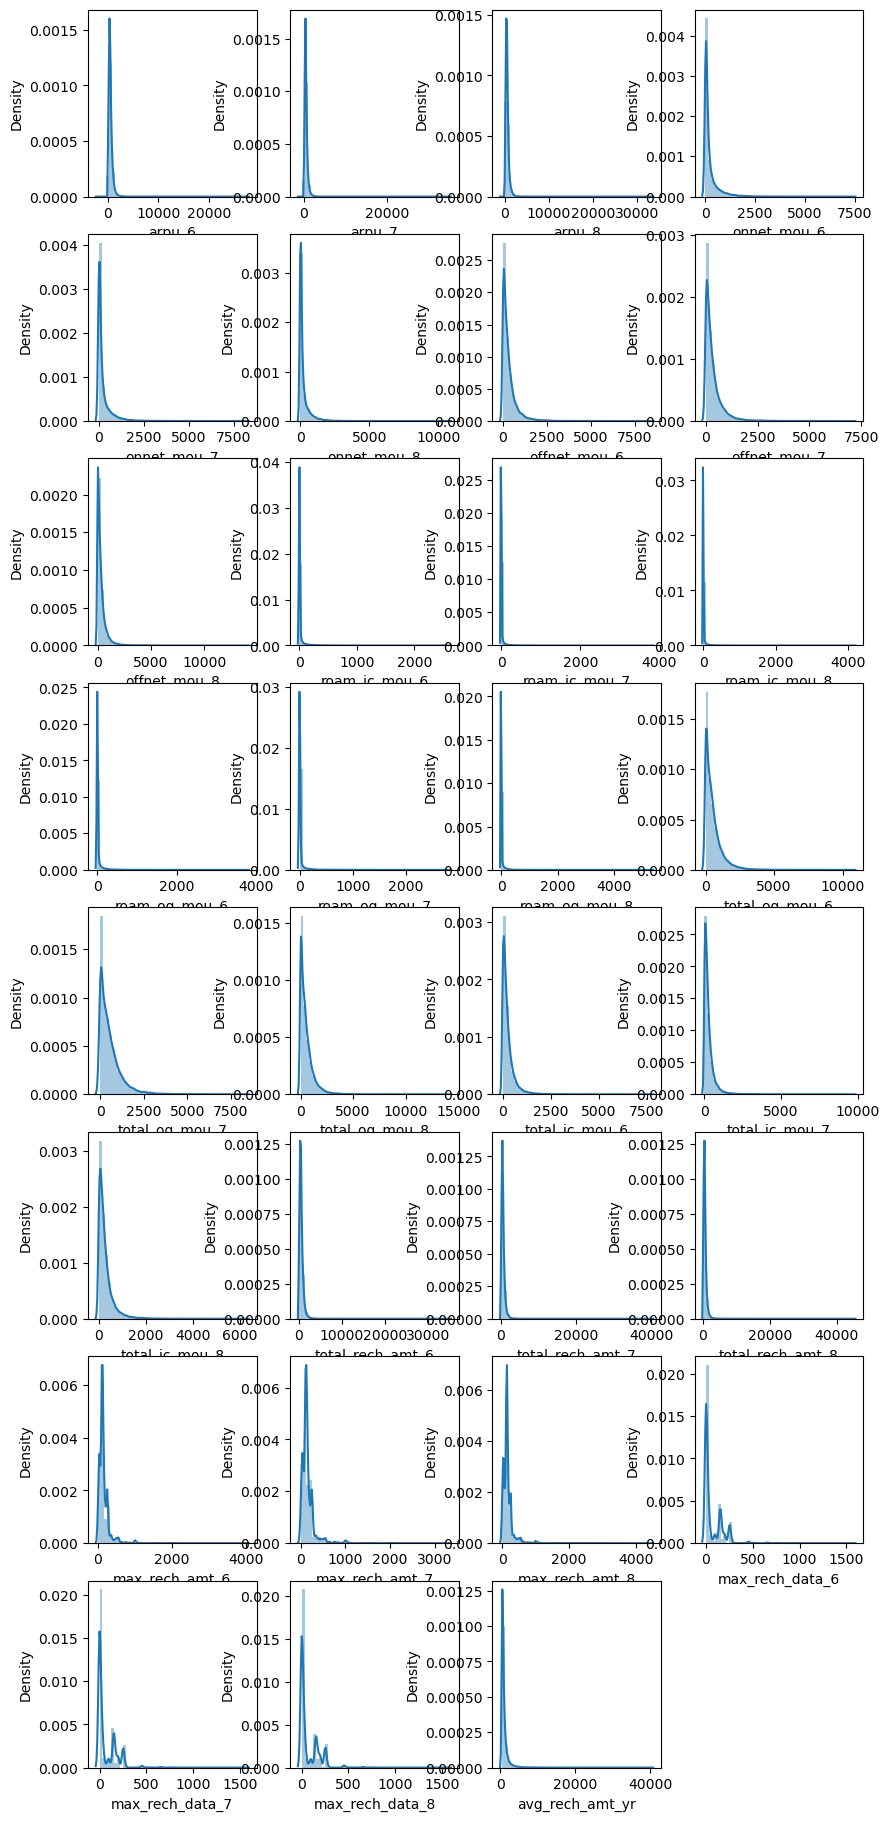

In [33]:
plt.figure(figsize=(10,20))
for i, v in enumerate (num_columns):
    plt.subplot(8,4,i+1)
    sns.distplot(high_val_customers[v])
#    plt.title('Distribution of '+v)
    plt.xlabel(v)
#    plt.ylabel('Density')
    plt.subplots_adjust(bottom=0.001)
plt.show()

### i. Variables are very **skewed** towards the right.

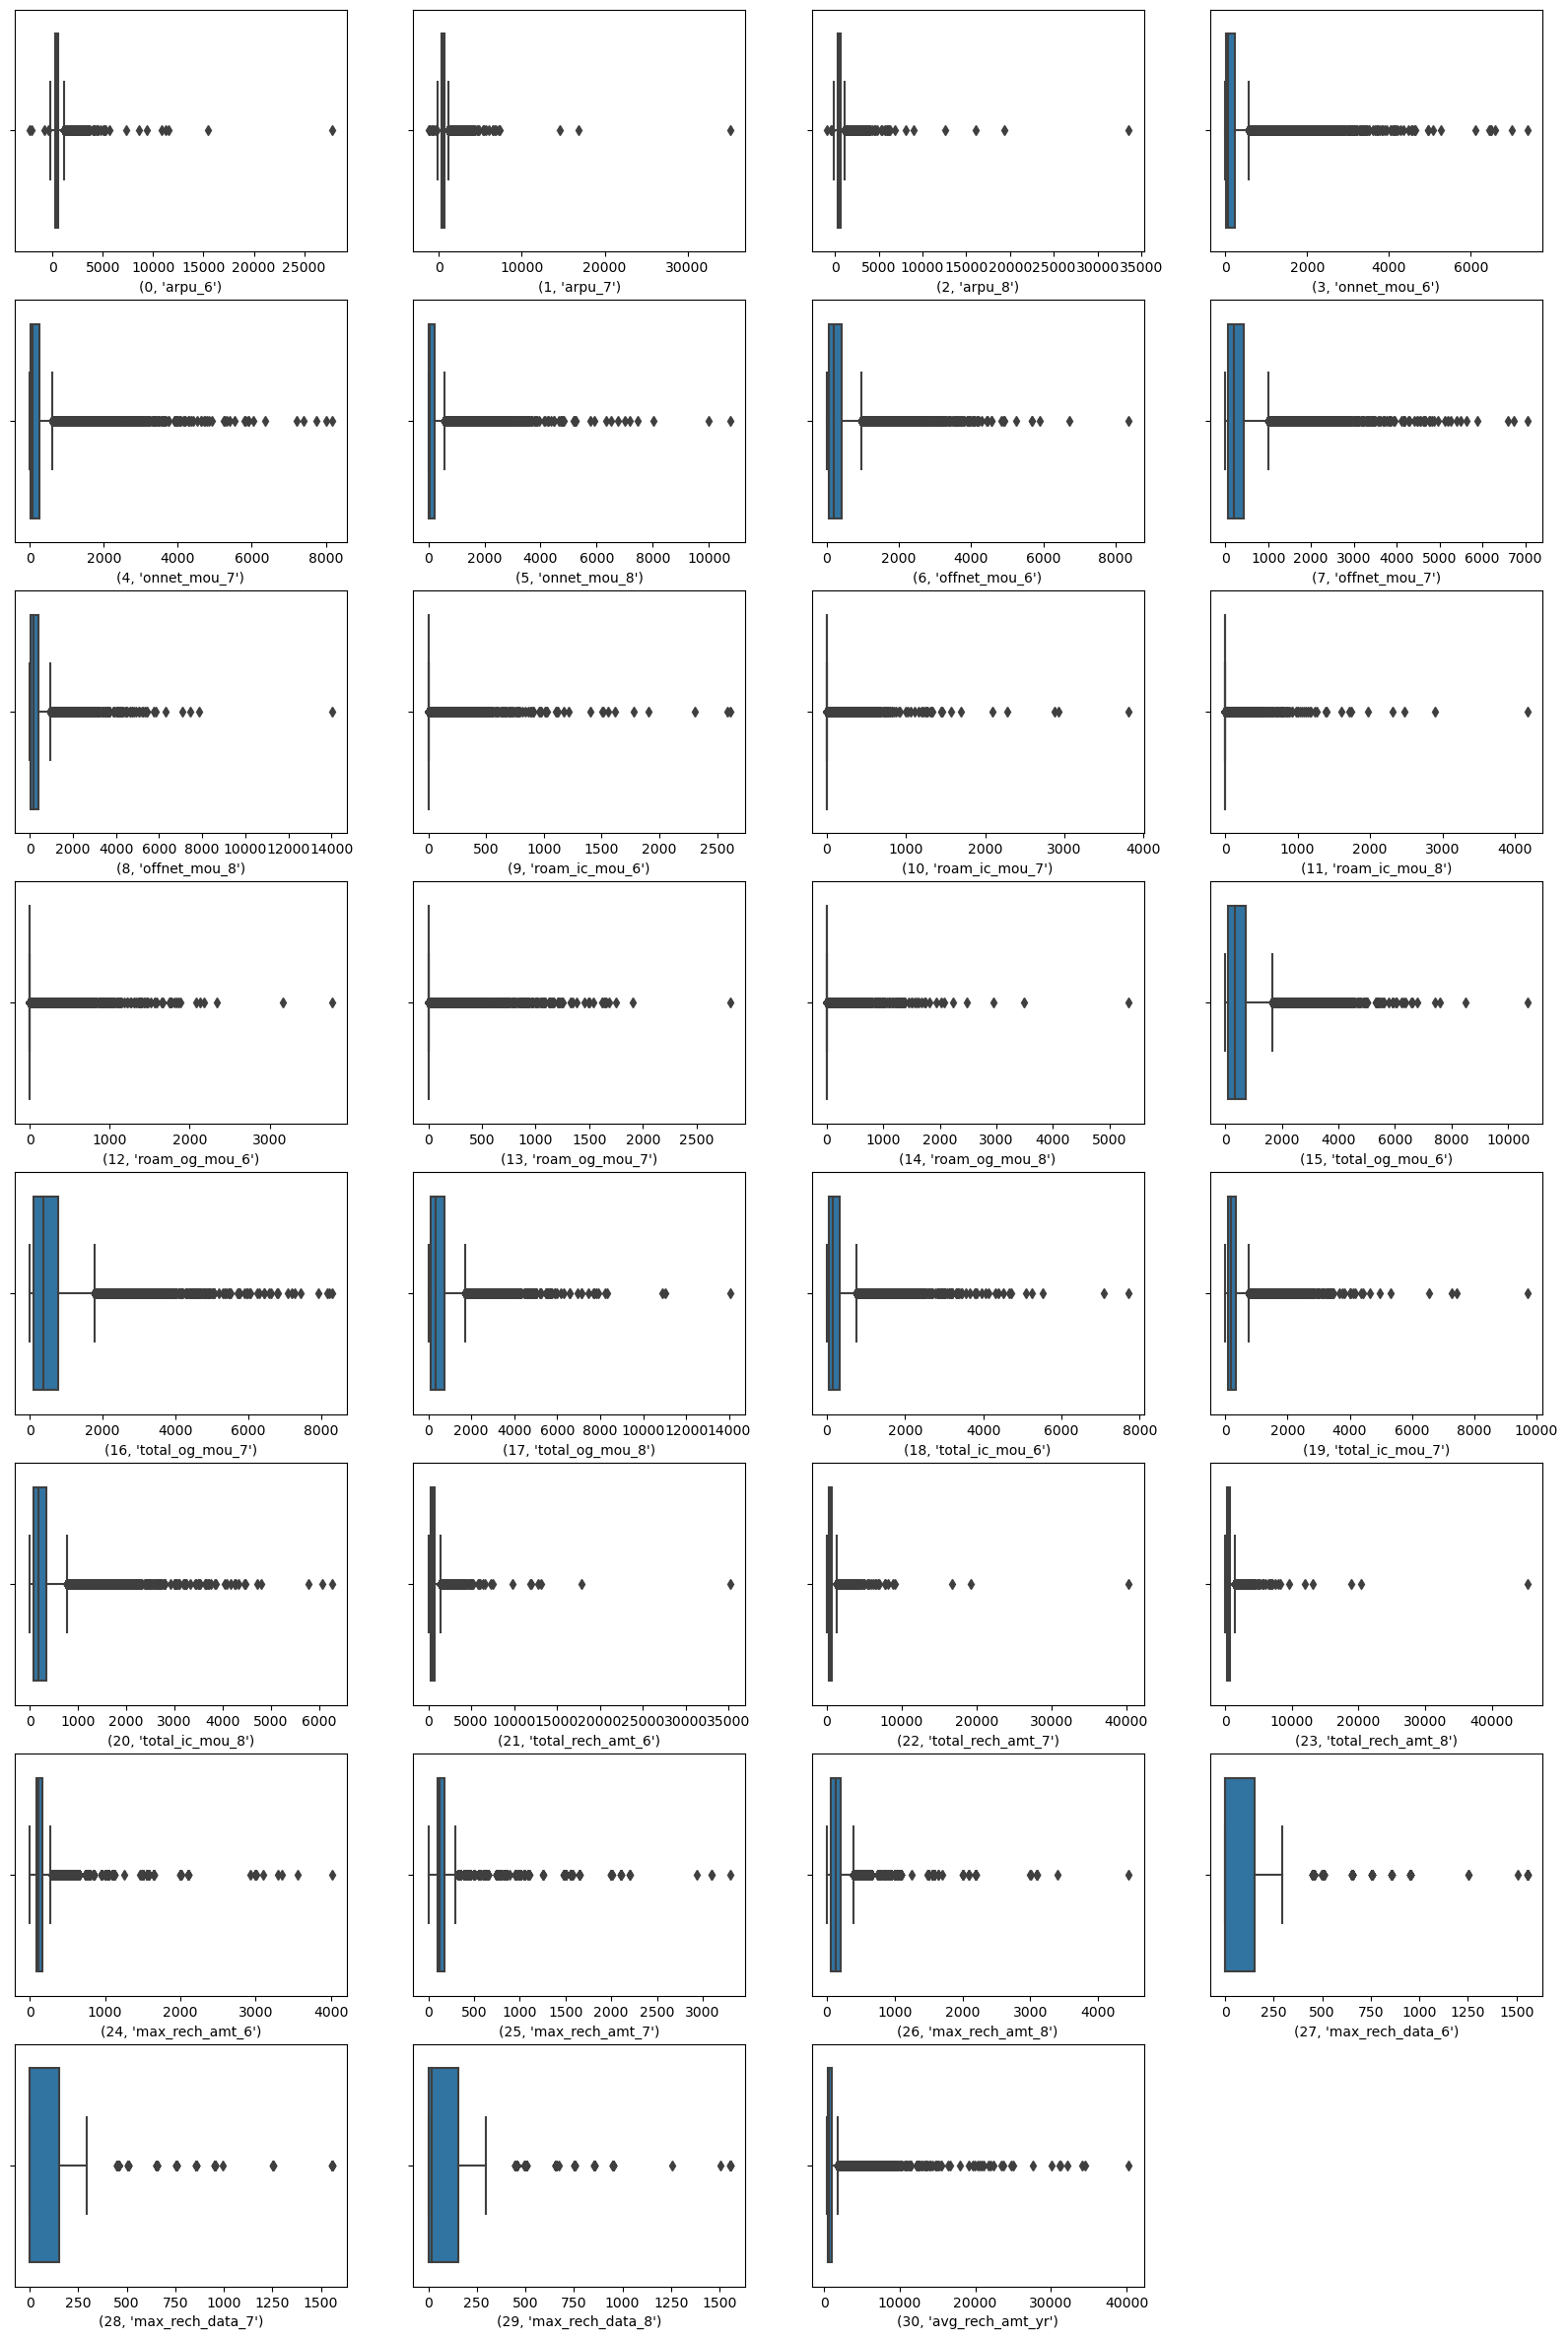

In [34]:
plt.figure(figsize=(20,30))
for i in enumerate(num_columns):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=high_val_customers)
    plt.xlabel(i)

### Outliers is observed in almost all variables in all the months

## ii. Visualise the categorical variable

<Axes: xlabel='age_group', ylabel='count'>

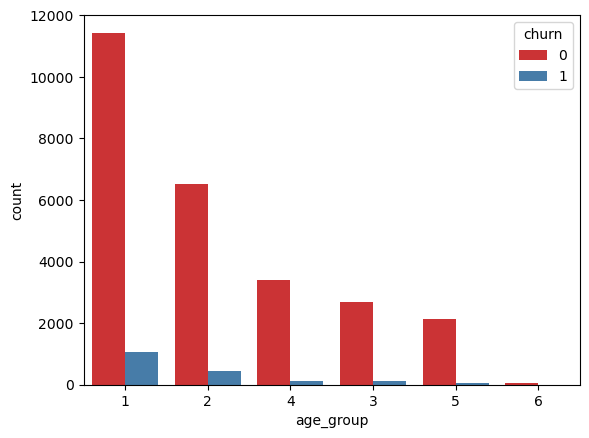

In [35]:
sns.countplot(x='age_group', hue = 'churn', palette="Set1", data=high_val_customers)

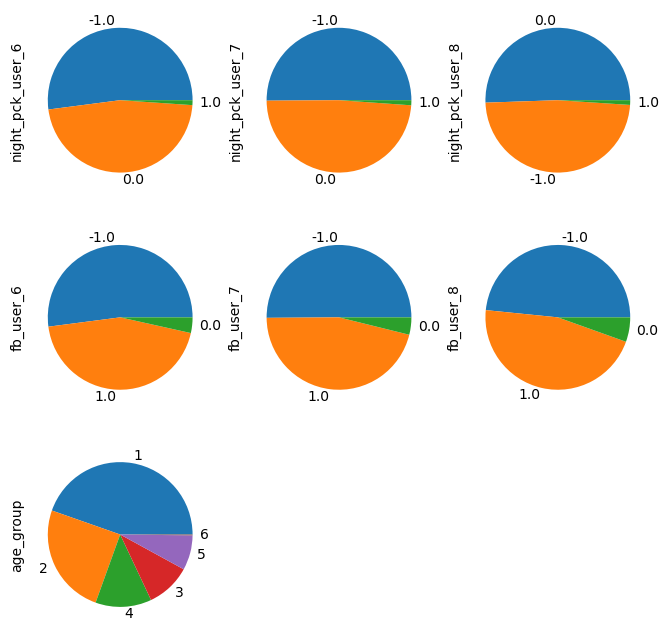

In [36]:
#checking distribution of categorical variables using pie plots
plt.figure(figsize=(8,7))
for i,v in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    high_val_customers[v].value_counts().plot.pie()
#    sns.distplot(data[v])
#    plt.title('Distribution of ' + v)
#    plt.xlabel(v)
#    plt.ylabel('Density')
    plt.subplots_adjust(bottom = 0.001)
plt.show()

### c) Bivariate Analysis


<Axes: xlabel='churn', ylabel='offnet_mou_7'>

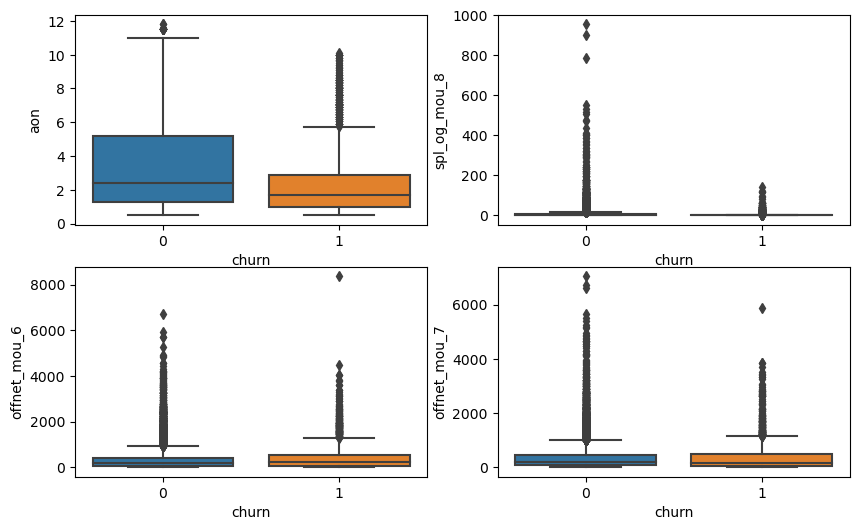

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(x='churn', y ='aon', data=high_val_customers)
plt.subplot(2,2,2)
sns.boxplot(x='churn', y ='spl_og_mou_8', data=high_val_customers)
plt.subplot(2,2,3)
sns.boxplot(x='churn', y ='offnet_mou_6', data=high_val_customers)
plt.subplot(2,2,4)
sns.boxplot(x='churn', y ='offnet_mou_7', data=high_val_customers)

<Axes: xlabel='churn', ylabel='days_last_mobile_rech_for_8th_month'>

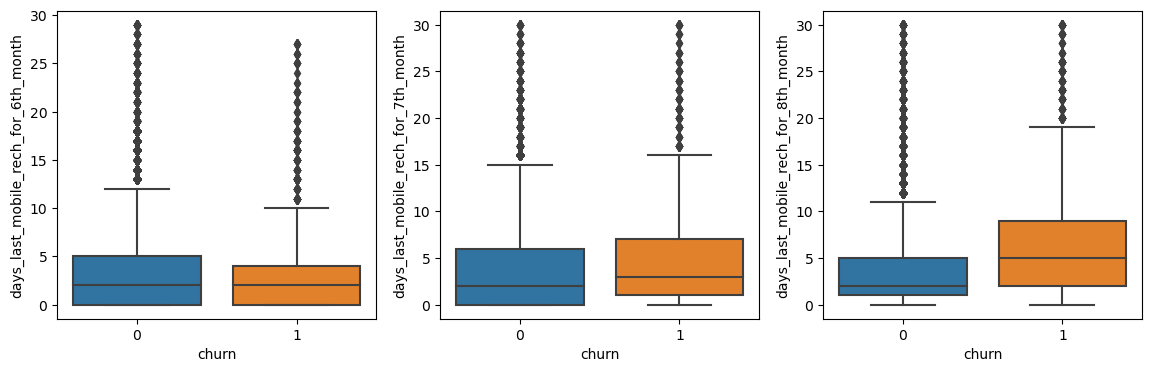

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.boxplot(x='churn', y ='days_last_mobile_rech_for_6th_month', data=high_val_customers)
plt.subplot(1,3,2)
sns.boxplot(x='churn', y ='days_last_mobile_rech_for_7th_month', data=high_val_customers)
plt.subplot(1,3,3)
sns.boxplot(x='churn', y ='days_last_mobile_rech_for_8th_month', data=high_val_customers)

<Axes: xlabel='churn', ylabel='days_last_data_rech_for_8th_month'>

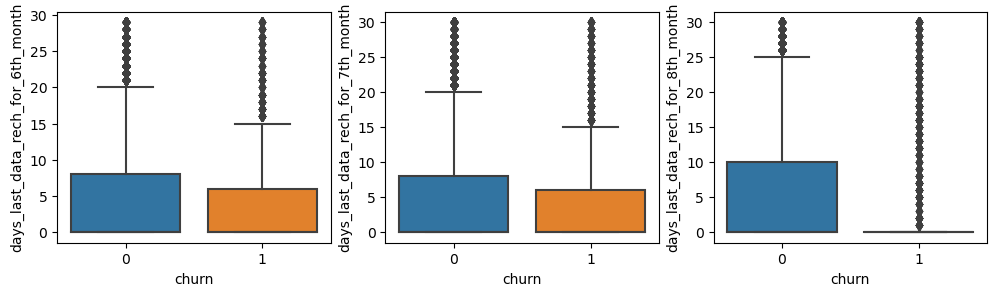

In [39]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.boxplot(x='churn', y ='days_last_data_rech_for_6th_month', data=high_val_customers)
plt.subplot(1,3,2)
sns.boxplot(x='churn', y ='days_last_data_rech_for_7th_month', data=high_val_customers)
plt.subplot(1,3,3)
sns.boxplot(x='churn', y ='days_last_data_rech_for_8th_month', data=high_val_customers)

In [40]:
# Cappign the outliers
for col in high_val_customers.select_dtypes(exclude = 'object').columns:
    perc = high_val_customers[col].quantile([0.05,0.95]).values
    high_val_customers[col]= np.clip(high_val_customers[col],perc[0],perc[1])

In [41]:
print(len(high_val_customers.drop('churn',1).select_dtypes(exclude = 'object').columns))

141


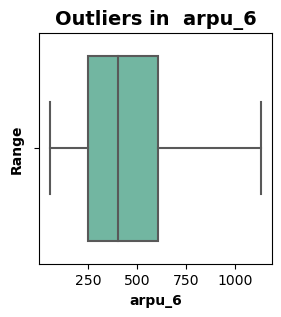

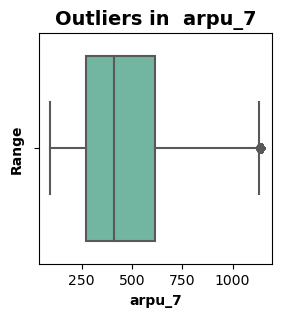

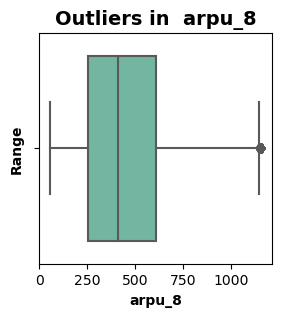

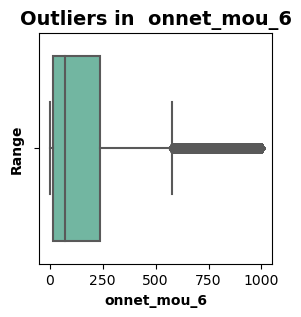

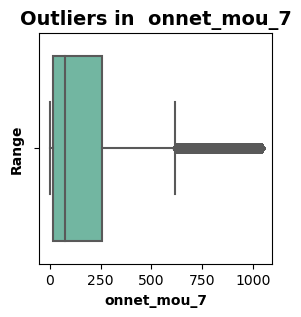

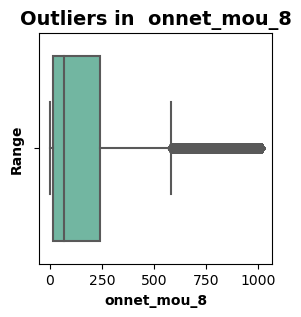

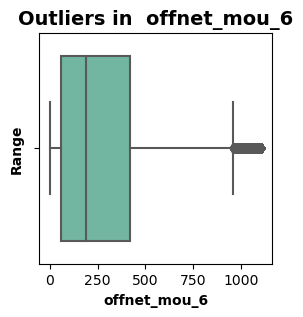

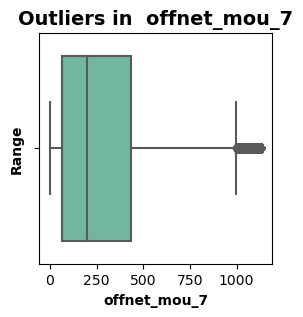

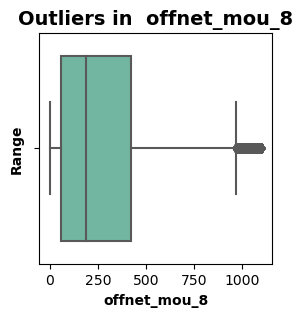

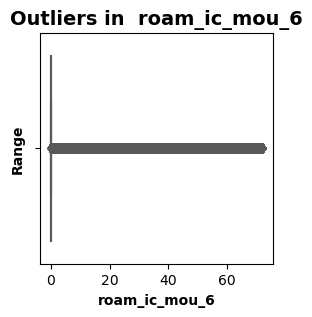

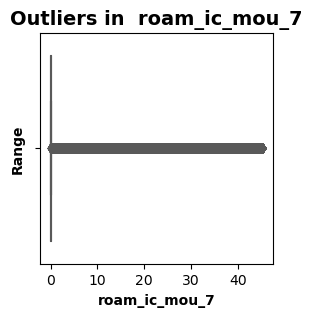

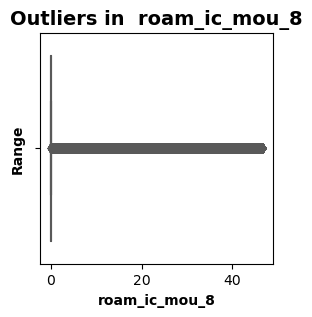

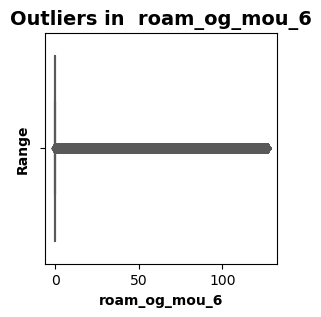

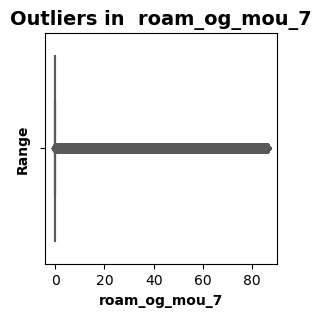

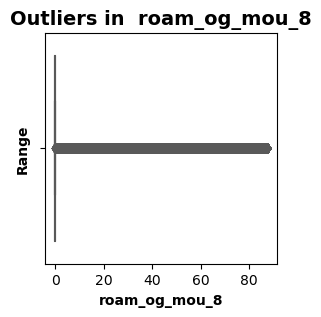

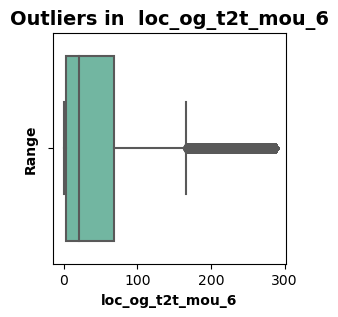

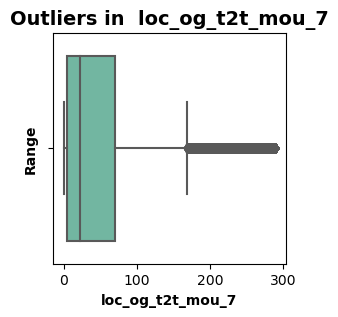

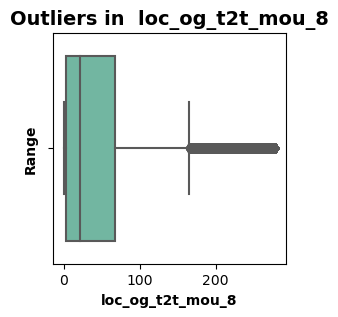

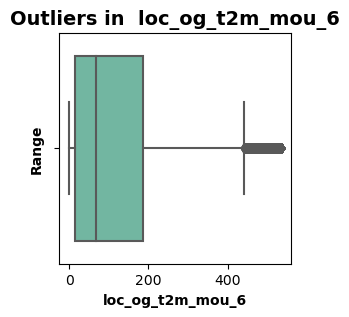

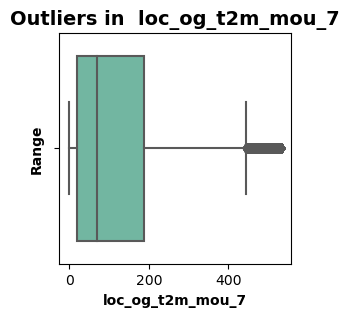

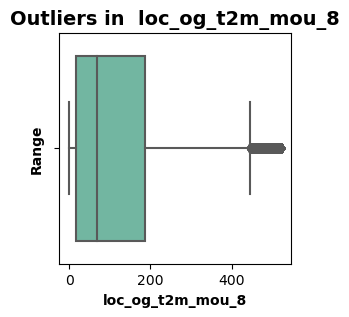

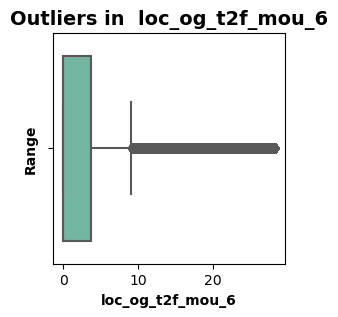

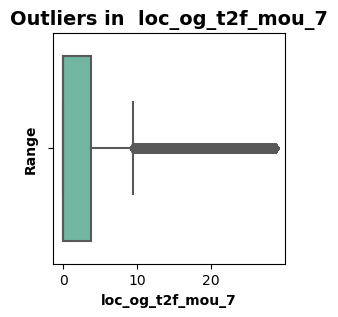

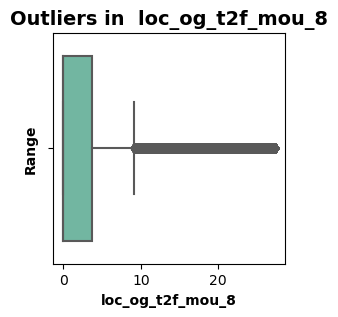

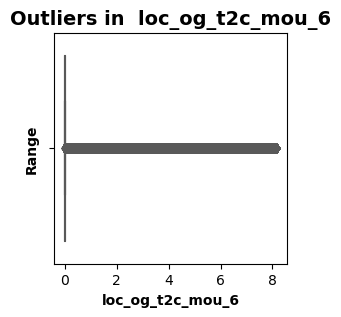

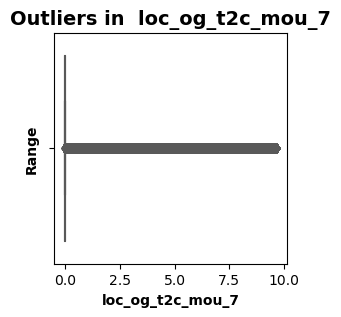

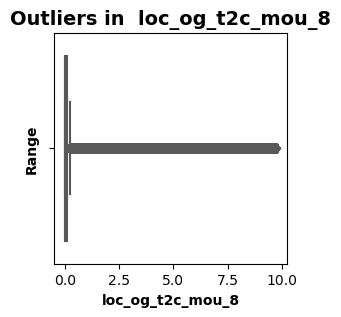

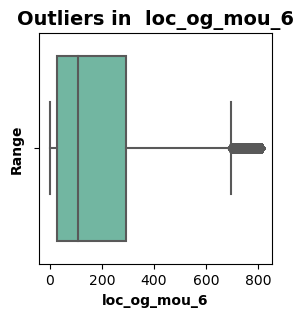

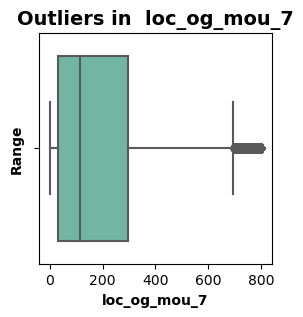

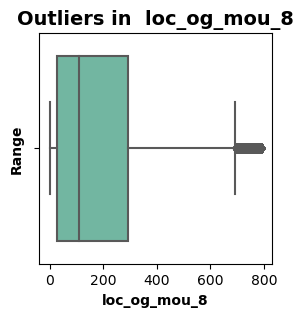

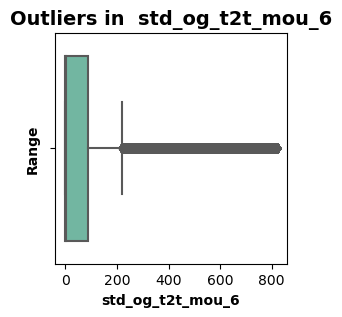

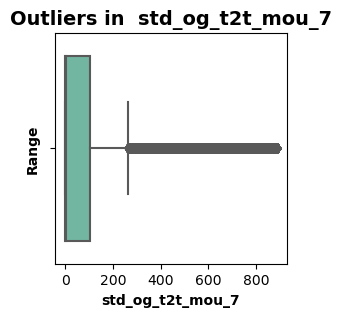

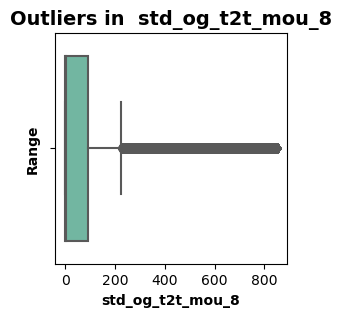

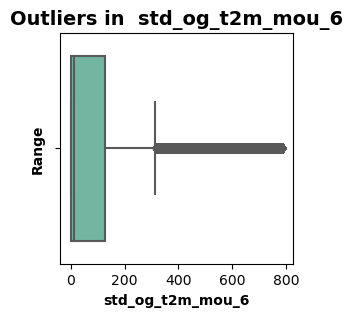

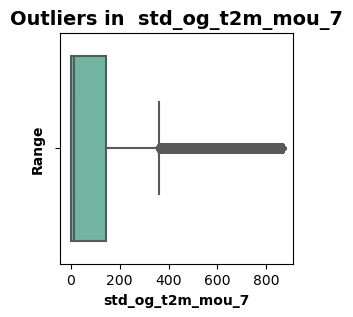

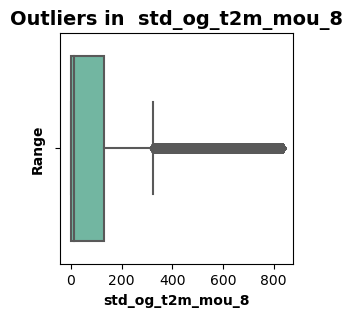

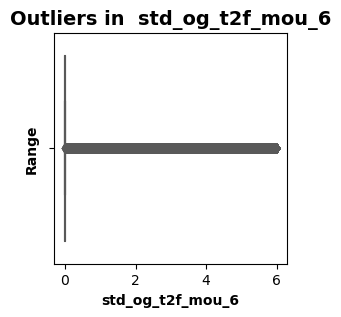

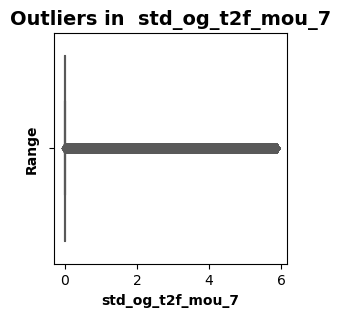

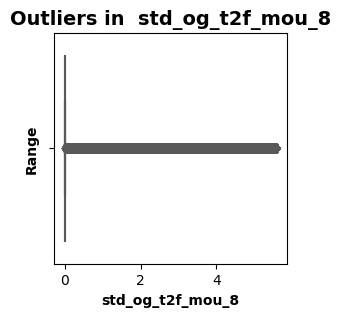

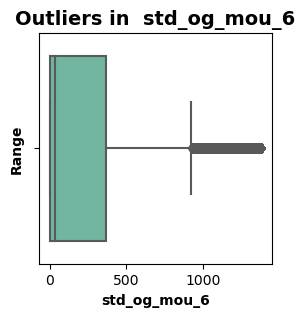

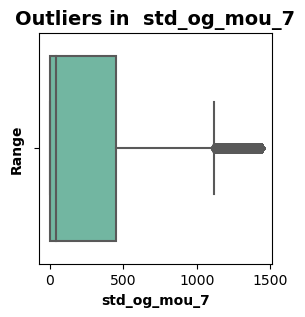

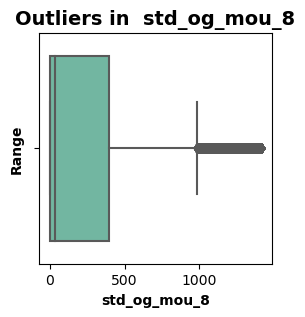

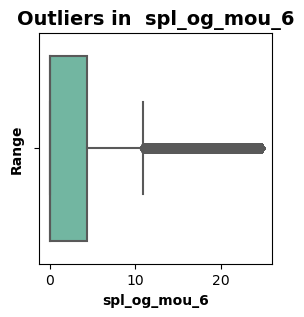

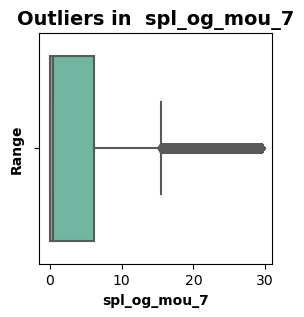

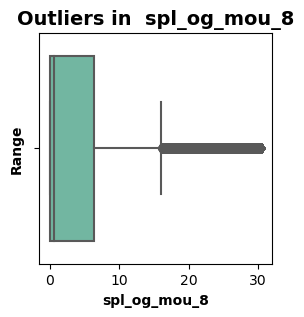

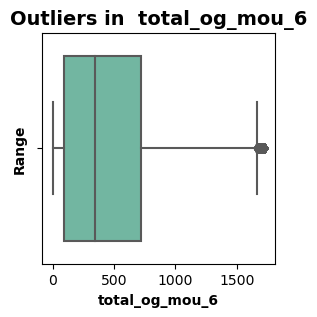

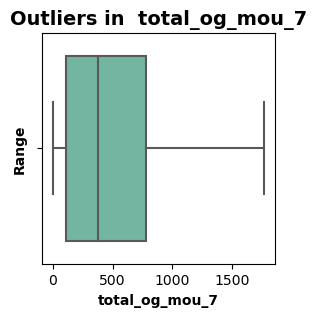

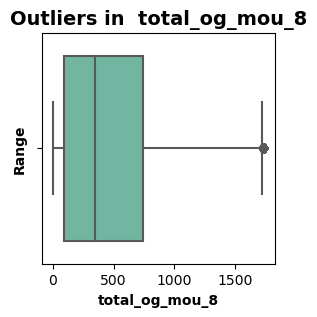

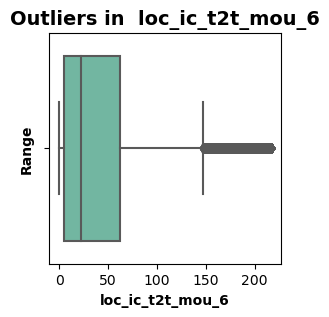

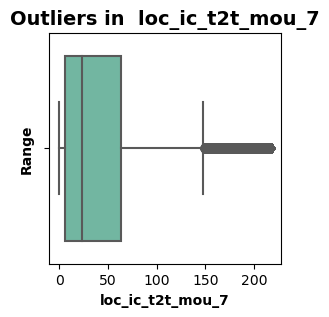

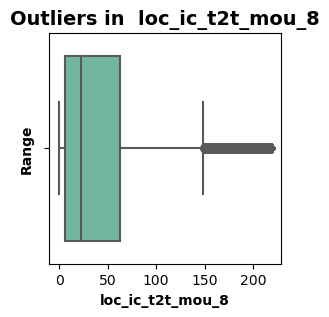

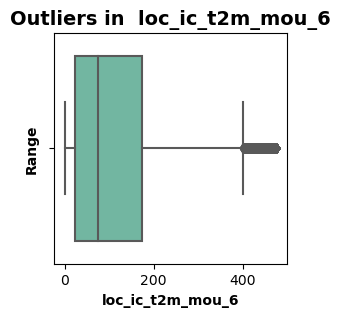

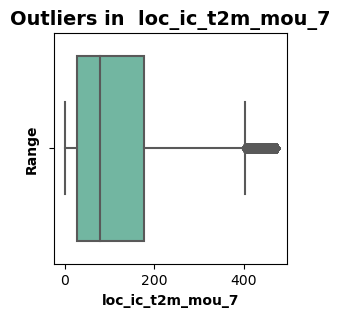

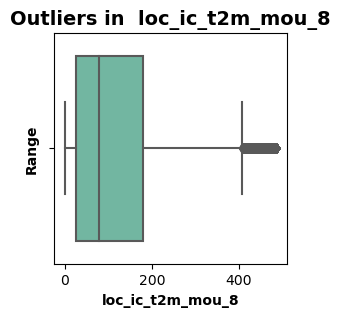

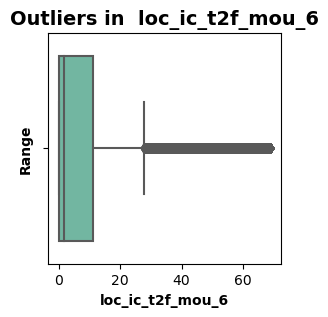

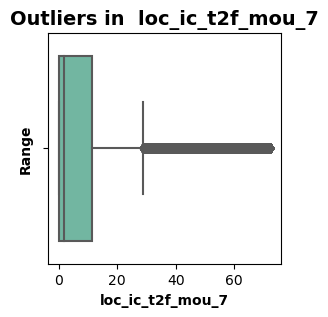

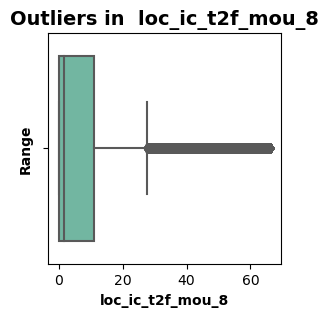

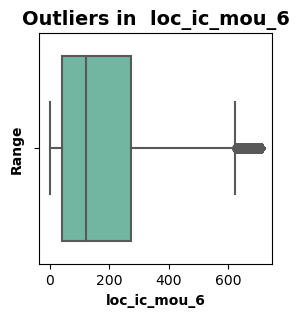

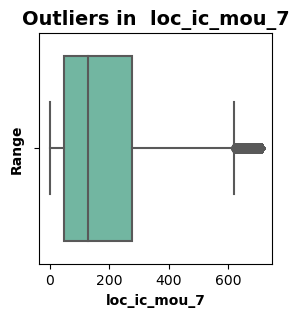

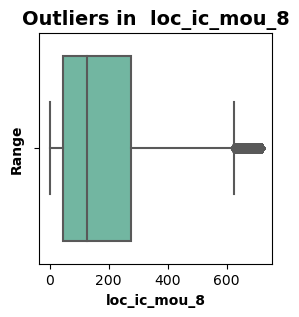

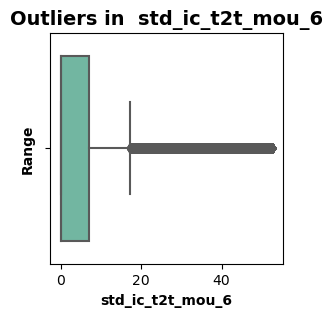

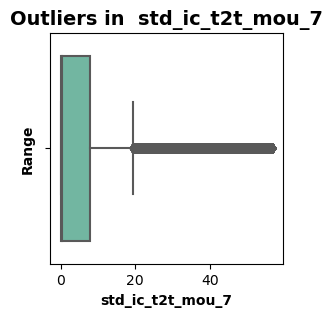

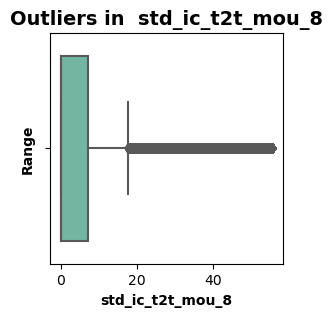

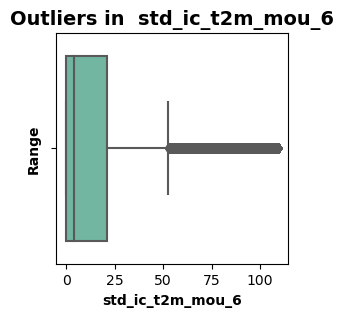

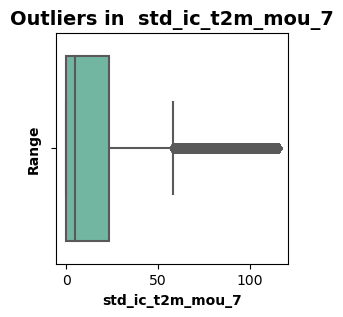

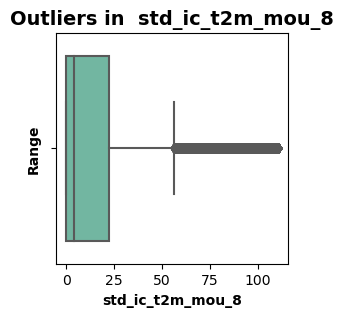

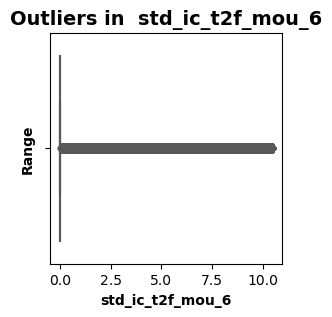

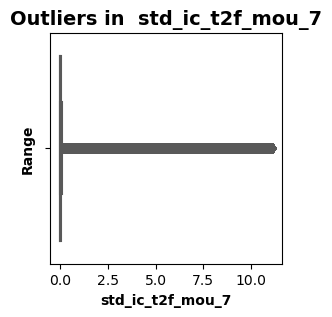

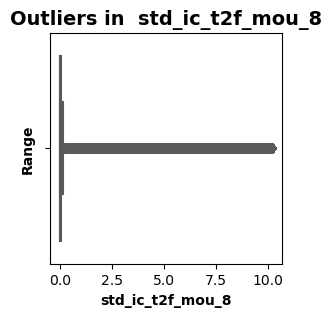

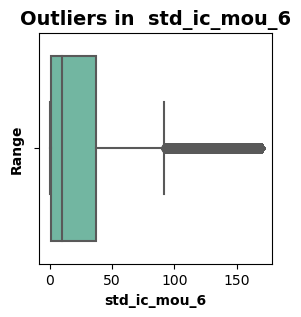

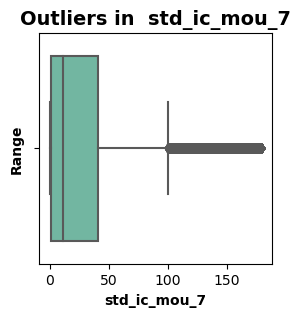

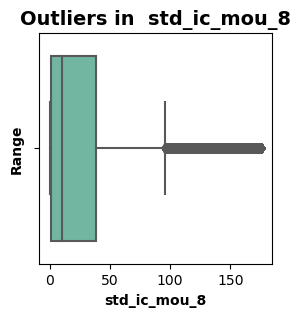

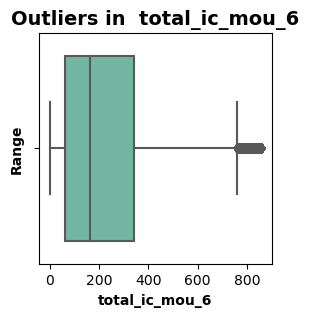

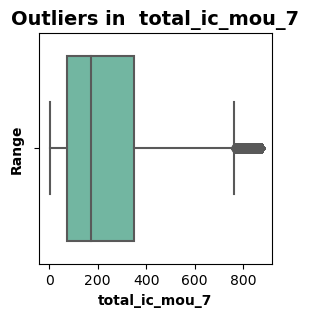

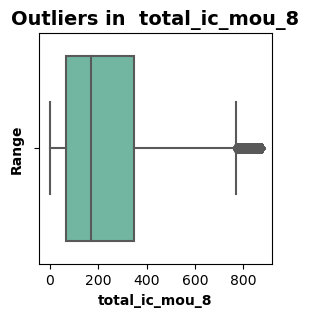

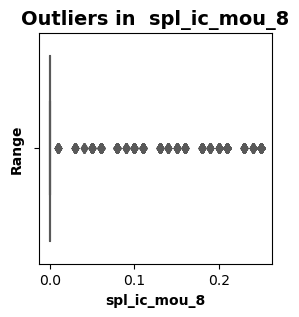

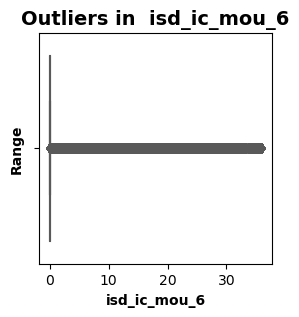

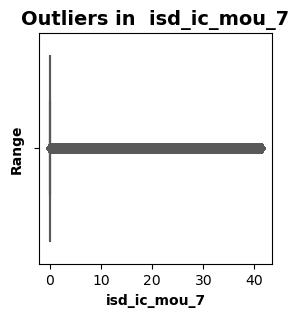

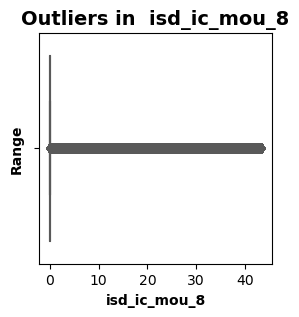

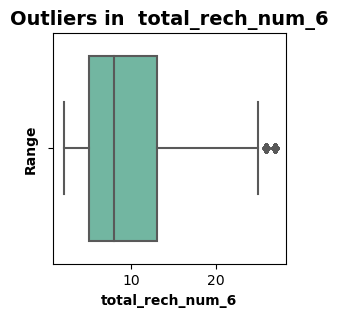

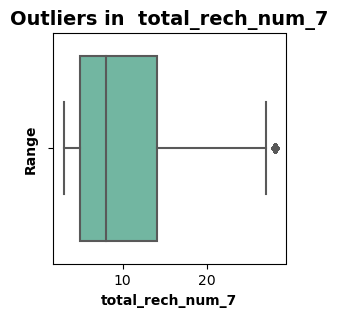

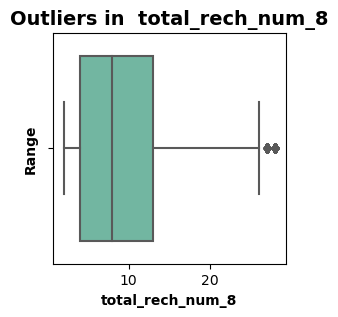

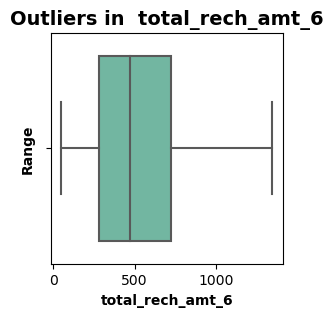

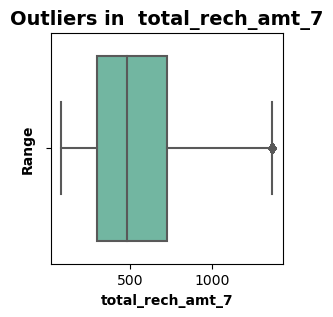

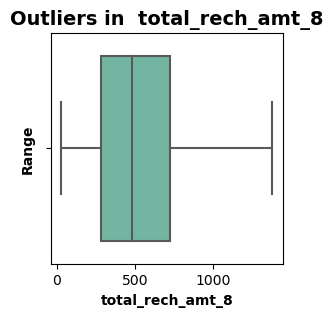

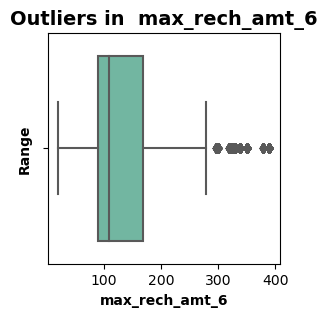

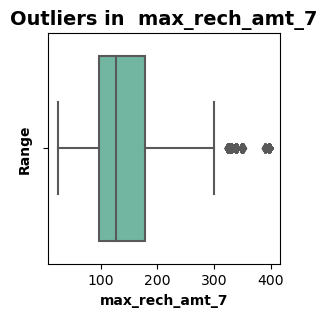

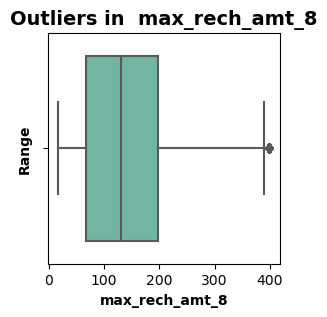

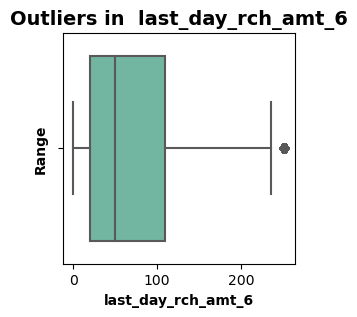

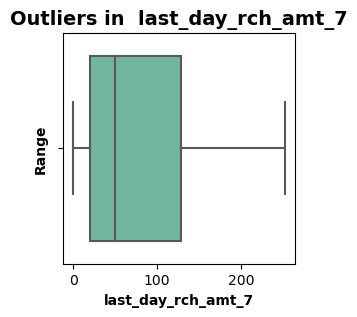

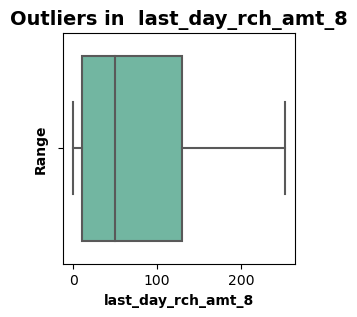

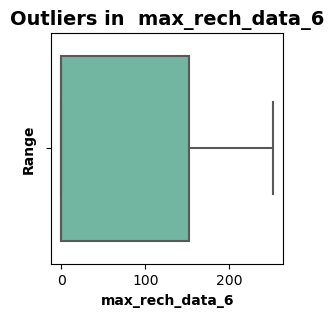

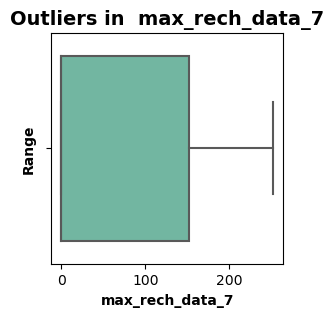

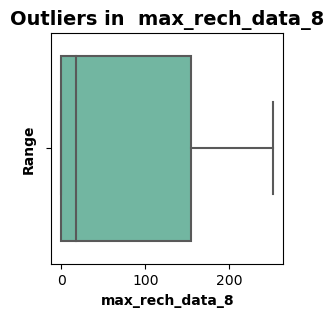

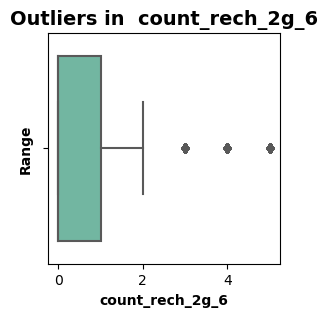

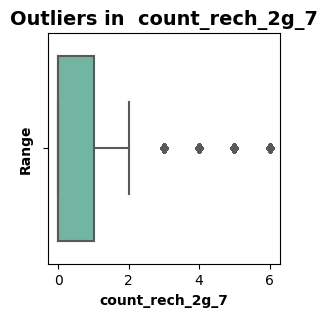

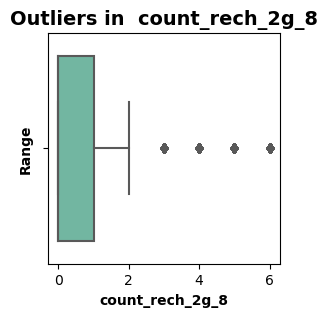

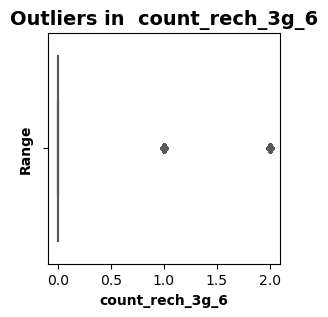

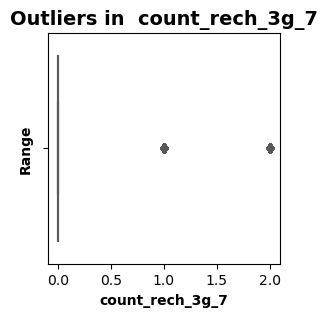

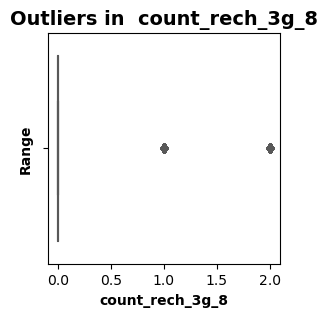

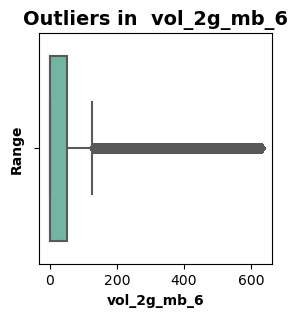

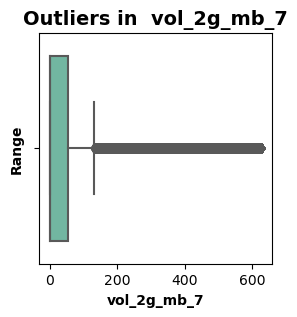

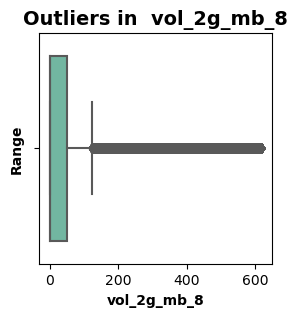

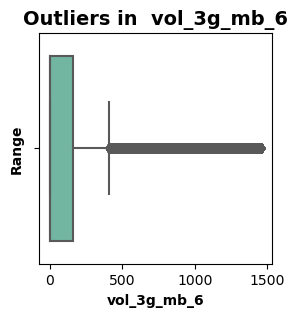

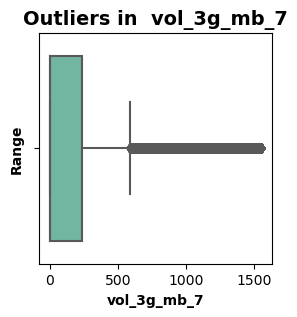

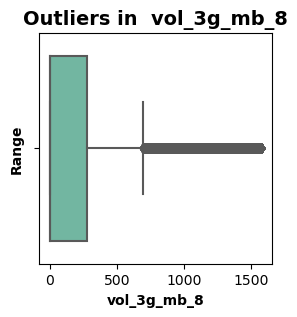

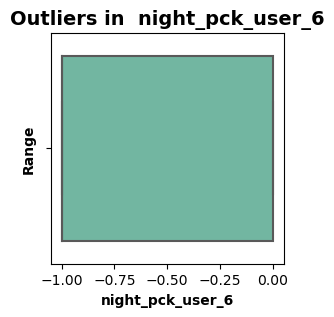

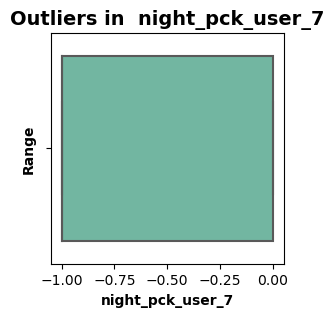

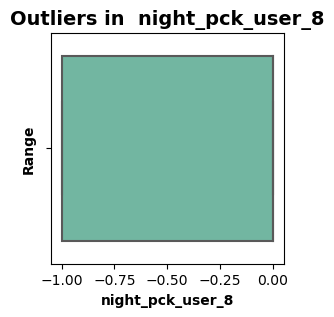

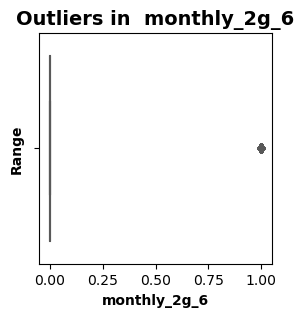

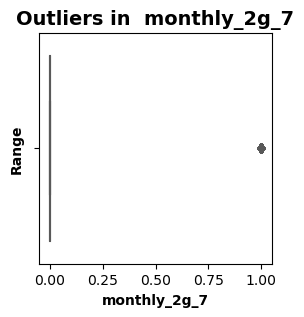

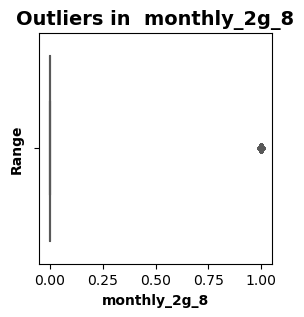

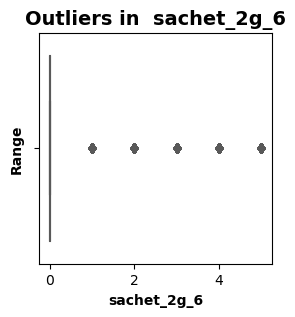

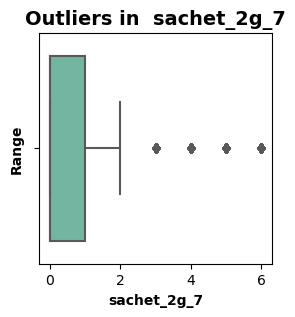

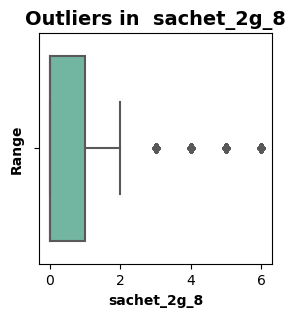

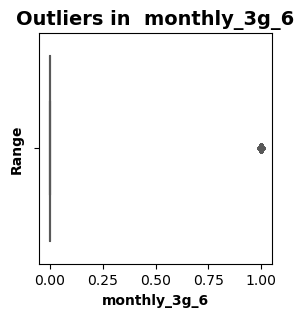

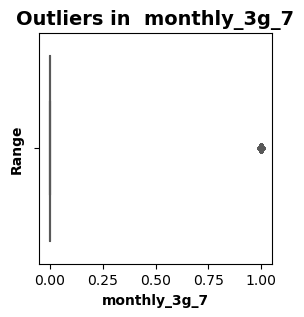

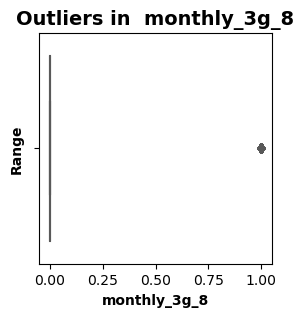

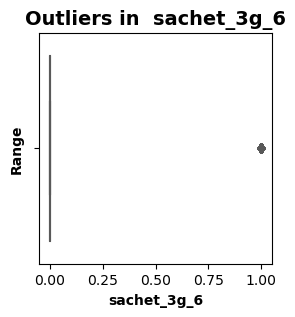

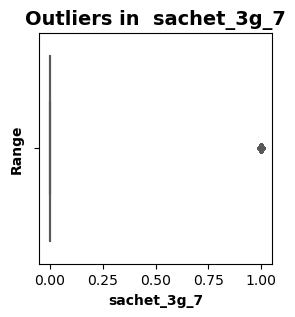

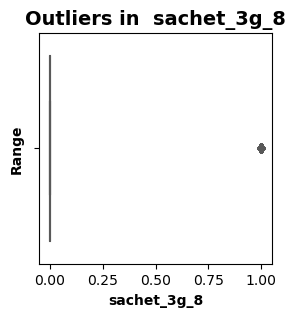

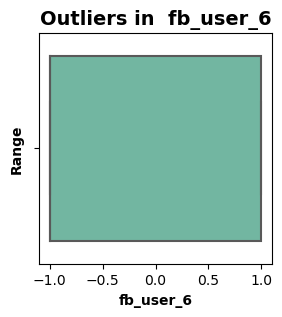

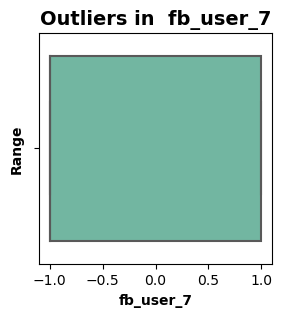

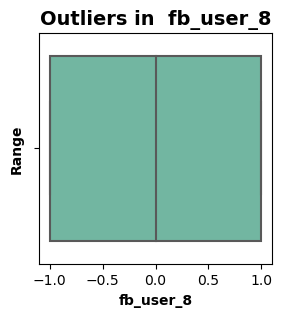

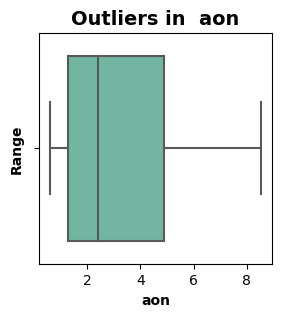

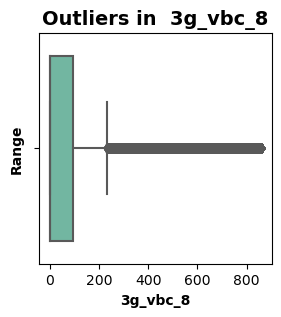

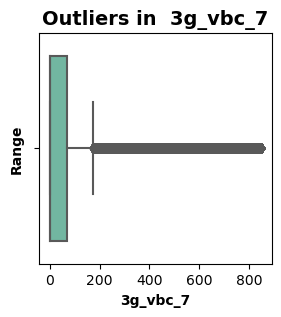

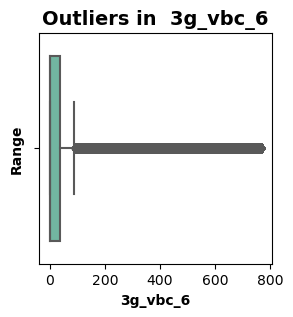

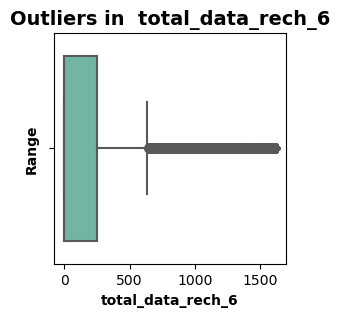

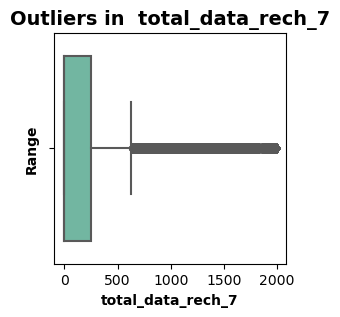

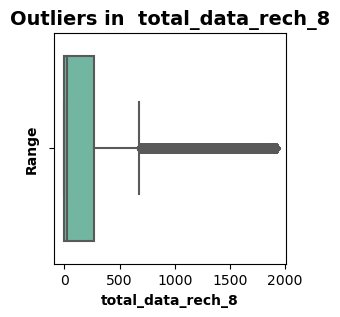

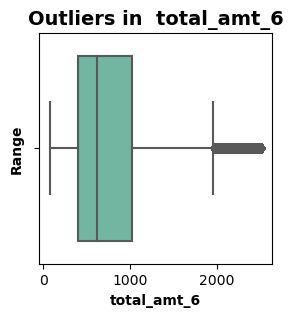

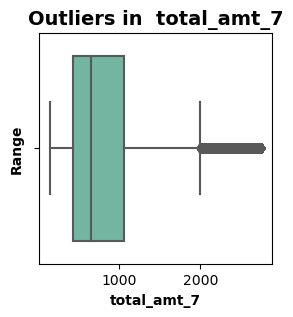

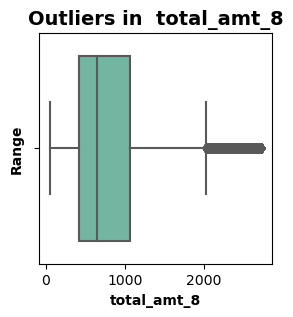

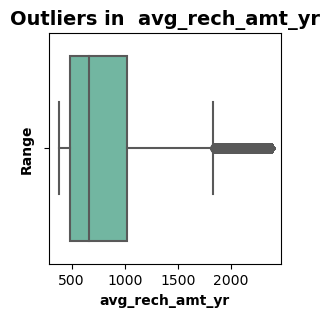

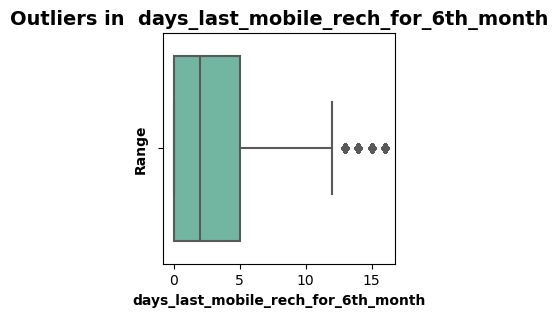

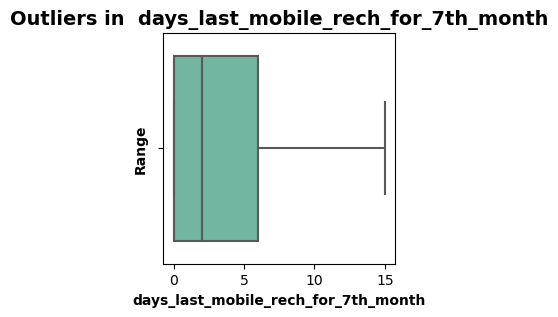

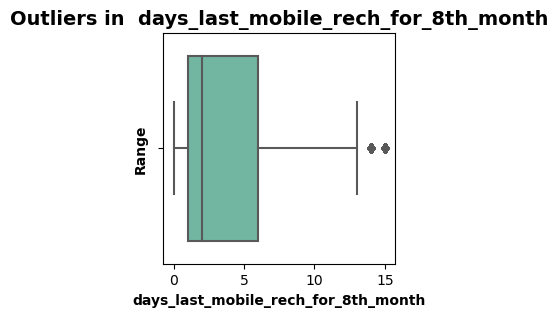

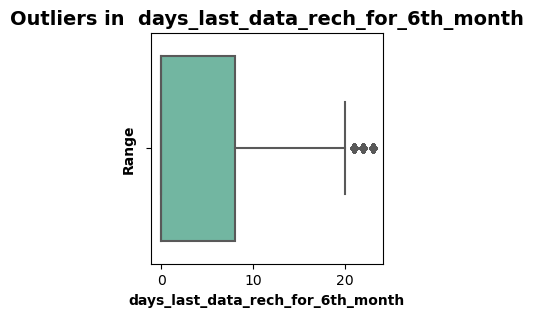

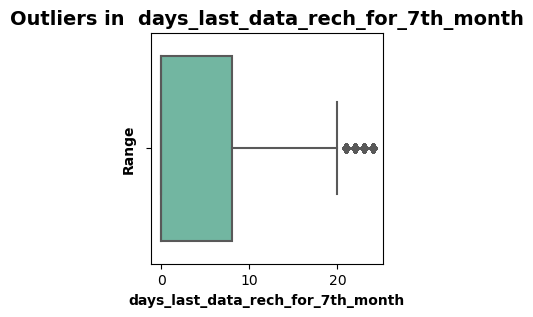

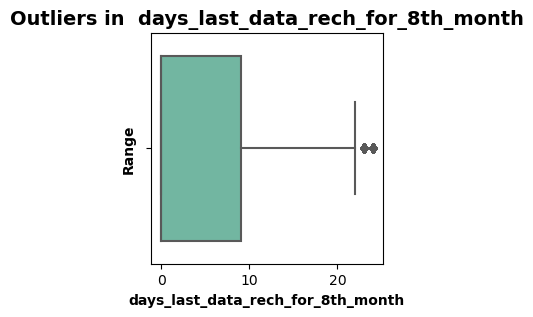

In [42]:
# Cheking whether any Outlier exists or not

for i  in high_val_customers.drop('churn',1).select_dtypes(exclude = 'object').columns:
    plt.figure(figsize =(3,3))
    ax = sns.boxplot(x=high_val_customers[i], orient="h", palette="Set2", whis = 1.5 )
    plt.title('Boxplot of '+' '+ i)
    plt.title("Outliers in "+' '+ i, fontsize = 14, fontweight = 'bold')
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel(i, fontweight = 'bold')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.show()

It is observed that only a few variables still have extreme values after the dataset has been processed for outliers. We leave this as it ease, as handling them beyond this stage will harm our dataset.

# Step 4 -  Model Selection, Model Building, and  Prediction
Let's start by splitting our data into a training set and a test set.

In [43]:
# divide data into train and test
X = high_val_customers.drop("churn", axis = 1)
y = high_val_customers.churn

## 1) Creating dummies for categorical columns


In [44]:
print(X.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27992 entries, 4 to 69997
Data columns (total 142 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    arpu_6                               float64
 1    arpu_7                               float64
 2    arpu_8                               float64
 3    onnet_mou_6                          float64
 4    onnet_mou_7                          float64
 5    onnet_mou_8                          float64
 6    offnet_mou_6                         float64
 7    offnet_mou_7                         float64
 8    offnet_mou_8                         float64
 9    roam_ic_mou_6                        float64
 10   roam_ic_mou_7                        float64
 11   roam_ic_mou_8                        float64
 12   roam_og_mou_6                        float64
 13   roam_og_mou_7                        float64
 14   roam_og_mou_8                        float64
 15   loc_og_t2t_mou_6 

In [45]:
X[categorical_columns]= X[categorical_columns].astype('object')
dummies = pd.get_dummies(X[categorical_columns])
dummies.head()

night_pck_user_6_-1.0  night_pck_user_6_0.0  night_pck_user_7_-1.0  night_pck_user_7_0.0  night_pck_user_8_-1.0  night_pck_user_8_0.0  fb_user_6_-1.0  fb_user_6_0.0  fb_user_6_1.0  fb_user_7_-1.0  fb_user_7_0.0  fb_user_7_1.0  fb_user_8_-1.0  fb_user_8_0.0  fb_user_8_1.0  age_group_1  age_group_2  age_group_3  age_group_4  age_group_5  age_group_6
4                       0                     1                      0                     1                      0                     1               0              0              1               0              0              1               0              0              1            1            0            0            0            0            0
7                       0                     1                      0                     1                      0                     1               0              0              1               0              0              1               0              0              1            1            0            0            0            0            0
12                      1                     0                      1                     0                      1                     0               1              0              0               1              0              0               1              0              0            1            0            0            0            0            0
15                      0                     1                      1                     0                      0                     1               0              0              1               1              0              0               0              0              1            1            0            0            0            0            0
23                      1                     0                      1                     0                      1                     0               1              0              0               1              0              0               1              0              0            1            0            0            0            0            0

In [46]:
#Dropping all the night pack & FB user categories wtih -1.0 and age_group 1
cols_to_drop = ['night_pck_user_6_-1.0','night_pck_user_7_-1.0','night_pck_user_8_-1.0','fb_user_6_-1.0','fb_user_7_-1.0','fb_user_8_-1.0','age_group_1']

dummies.drop(cols_to_drop, axis =1, inplace = True)
dummies.head()

#concatenating the dummy variables with Original DataFrame
X = pd.concat([X,dummies], axis =1)
print(high_val_customers.shape)

# drop duplicate columns
X.drop(categorical_columns,axis =1, inplace = True)
print(X.shape)

(27992, 143)
(27992, 149)


### Scaling the numeric variable using standard scalar

In [47]:
## Scaling the train and test data
scaler = StandardScaler()

# Numeric columns list
num_columns = list(X.select_dtypes(include=['int64', 'int32', 'float64']).columns)
print(len(num_columns))

#For Training dataset
X[num_columns] = scaler.fit_transform(X[num_columns])
X.head()

135


arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  3g_vbc_8  3g_vbc_7  3g_vbc_6  total_data_rech_6  total_data_rech_7  total_data_rech_8  total_amt_6  total_amt_7  total_amt_8  avg_rech_amt_yr  days_last_mobile_rech_for_6th_month  days_last_mobile_rech_for_7th_month  days_last_mobile_rech_for_8th_month  days_last_data_rech_for_6th_month  days_last_data_rech_for_7th_month  days_last_data_rech_for_8th_month  night_pck_user_6_0.0  night_pck_user_7_0.0  night_pck_user_8_0.0  fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  fb_user_8_1.0  age_group_2  age_group_3  age_group_4  age_group_5  age_group_6
4    -0.76   -1.24   -1.26        -0.63        -0.69        -0.68         -0.77         -0.85         -0.93           2.62          -0.33          -0.34           0.13          -0.34          -0.34             -0.57             -0.65             -0.63             -0.60             -0.74             -0.83              1.07             -0.36              0.16             -0.40              3.37             -0.43         -0.61         -0.78         -0.81             -0.50             -0.51             -0.50             -0.54             -0.57             -0.55             -0.33             -0.33             -0.32         -0.63         -0.67         -0.65         -0.56          1.47         -0.60           -0.87           -0.96           -0.98             -0.69             -0.78             -0.75             -0.86             -0.94             -0.80             -0.27             -0.38             -0.23         -0.86         -0.95         -0.84             -0.52             -0.53             -0.52             -0.61             -0.63             -0.62             -0.39             -0.39             -0.39         -0.66         -0.67         -0.66           -0.93           -1.02           -0.92         -0.31         -0.35         -0.36         -0.36              0.43             -0.07             -0.24             -0.72             -1.22             -1.19           -0.96           -1.10           -1.23               -0.75               -0.93               -0.64            -0.42            -0.26            -0.45             2.98  

## 2. Feature elimination using the PCA

In [48]:
pca = PCA(random_state=100)
pca.fit(X)

PCA(random_state=100)

### Components from the PCA

In [49]:
pca.components_

array([[ 1.37403607e-01,  1.47775514e-01,  1.36629149e-01, ...,
         9.48683076e-03,  6.63888864e-03,  2.03385299e-04],
       [ 1.18063070e-02, -3.89968719e-03,  5.63036199e-03, ...,
         1.39710578e-02,  1.00428827e-02,  4.94585109e-04],
       [ 1.22395763e-01,  1.53195011e-01,  1.36666770e-01, ...,
        -1.35168017e-02, -1.07026464e-02, -1.32627881e-04],
       ...,
       [ 1.76408423e-16, -1.03335337e-16,  7.39946313e-17, ...,
         7.16993646e-17,  7.18553608e-17,  4.11065773e-16],
       [ 0.00000000e+00, -1.09224075e-16,  3.27935243e-18, ...,
         1.78239335e-16,  1.64465590e-16,  4.92472165e-16],
       [ 0.00000000e+00,  1.74010702e-17,  2.12917530e-17, ...,
        -1.45848263e-16, -1.22144821e-16,  2.01816425e-16]])

Looking at the explained variance ratio for each component

In [50]:
pca.explained_variance_ratio_

array([1.40065465e-01, 1.15245497e-01, 7.16932907e-02, 5.79964344e-02,
       4.15591724e-02, 3.15384519e-02, 3.04985316e-02, 2.64577348e-02,
       2.59737818e-02, 2.24765261e-02, 1.91016898e-02, 1.73764818e-02,
       1.70034344e-02, 1.64038812e-02, 1.48662453e-02, 1.47878212e-02,
       1.44856419e-02, 1.32295711e-02, 1.21231080e-02, 1.15126355e-02,
       1.05134528e-02, 9.72676143e-03, 8.99860084e-03, 8.67544661e-03,
       8.46095538e-03, 7.78253480e-03, 7.53838356e-03, 7.40535047e-03,
       7.09125425e-03, 7.04632228e-03, 6.77032564e-03, 6.59719849e-03,
       6.49552022e-03, 6.41774890e-03, 6.01039013e-03, 5.89224298e-03,
       5.55168804e-03, 5.40546306e-03, 5.19921081e-03, 5.08486619e-03,
       4.90859240e-03, 4.84669839e-03, 4.71008536e-03, 4.42705993e-03,
       4.41302877e-03, 4.14053603e-03, 4.13059286e-03, 4.05296732e-03,
       3.89334824e-03, 3.72661318e-03, 3.58274683e-03, 3.51417637e-03,
       3.35950498e-03, 3.22377368e-03, 3.17618098e-03, 2.97812873e-03,
      

Making a scree plot for the explained variance

In [51]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [52]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      14.01
1      25.53
2      32.70
3      38.50
4      42.66
5      45.81
6      48.86
7      51.51
8      54.10
9      56.35
10     58.26
11     60.00
12     61.70
13     63.34
14     64.83
15     66.30
16     67.75
17     69.08
18     70.29
19     71.44
20     72.49
21     73.46
22     74.36
23     75.23
24     76.08
25     76.86
26     77.61
27     78.35
28     79.06
29     79.76
30     80.44
31     81.10
32     81.75
33     82.39
34     82.99
35     83.58
36     84.14
37     84.68
38     85.20
39     85.71
40     86.20
41     86.68
42     87.15
43     87.60
44     88.04
45     88.45
46     88.86
47     89.27
48     89.66
49     90.03
50     90.39
51     90.74
52     91.08
53     91.40
54     91.72
55     92.01
56     92.30
57     92.58
58     92.86
59     93.13
60     93.38
61     93.61
62     93.84
63     94.06
64     94.28
65     94.49
66     94.69
67     94.89
68     95.09
69     95.29
70     95.48
71     95.67
72     95.86
73     96.03
74     96.21
75     96.38
76     96.53

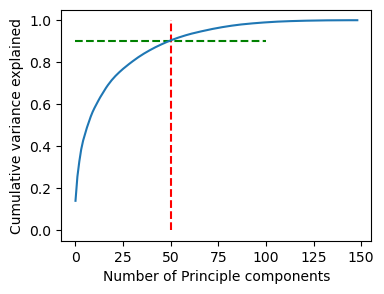

In [53]:
fig = plt.figure(figsize=[4,3])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("Number of Principle components")
plt.ylabel("Cumulative variance explained")
plt.show()

Looks like 50 components are enough to describe 90% of the variance in the dataset. We'll choose 50 components for our modeling.

Perform PCA with 50 components

In [54]:
pca_final = IncrementalPCA(n_components=50)

In [55]:
X_pca = pca_final.fit_transform(X)

In [56]:
X_pca.shape

(27992, 50)

In [57]:
corrmat = np.corrcoef(X_pca.transpose())

In [58]:
corrmat.shape

(50, 50)

Plotting the heatmap of the corr matrix

<Axes: >

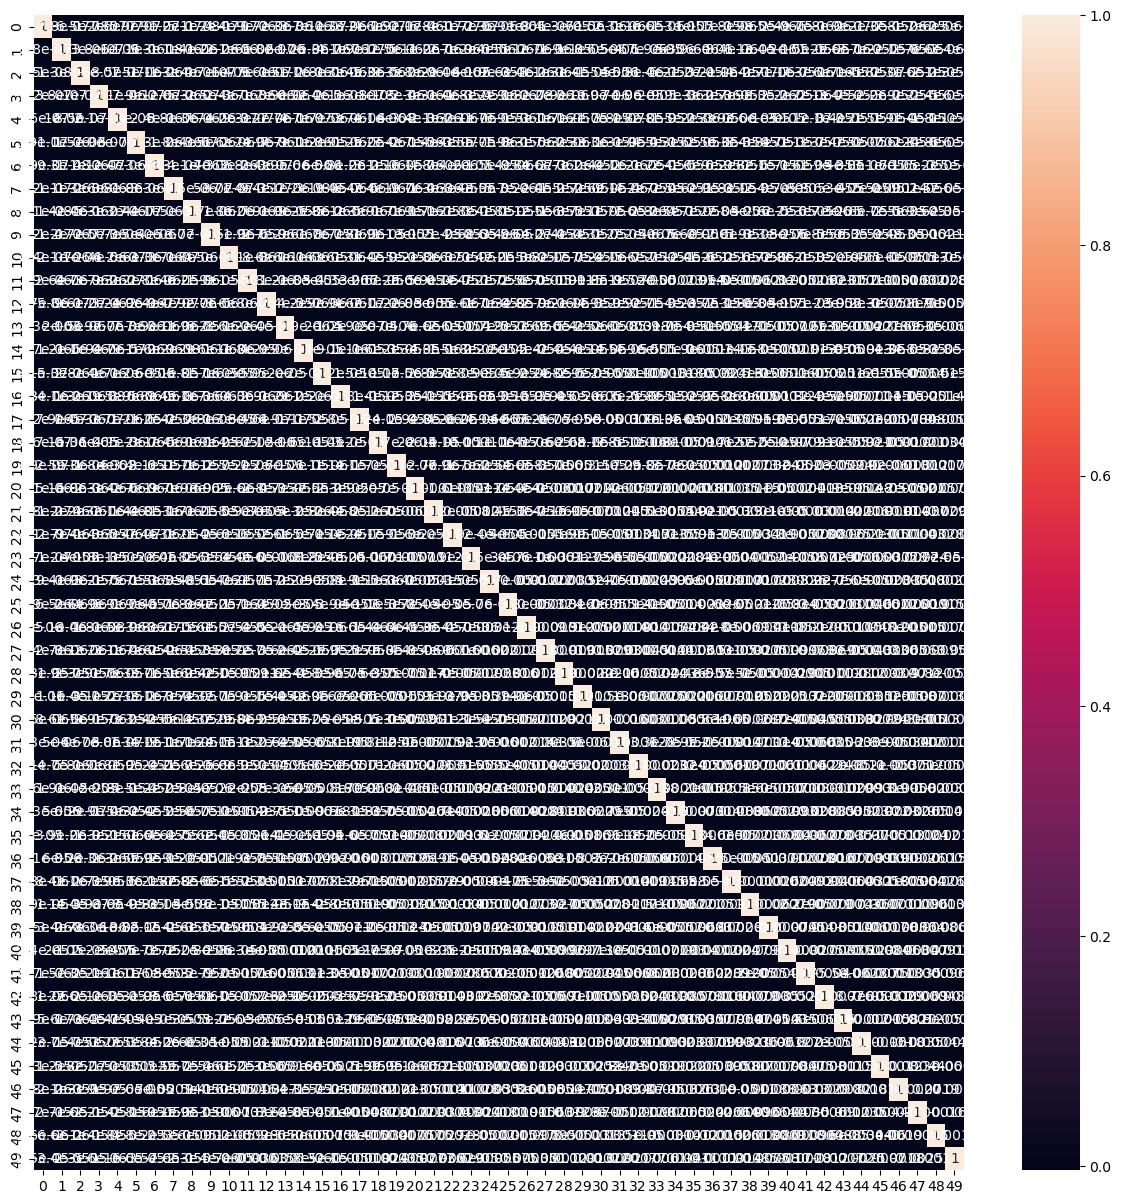

In [59]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [60]:
print("Size of earlier dataset was :",X.shape)
print("Size of dataset after PCA is:", X_pca.shape)

Size of earlier dataset was : (27992, 149)
Size of dataset after PCA is: (27992, 50)


## 3. Splitting Data into Training and Test Sets

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.25, random_state = 100, stratify = y)
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20994, 50)
(20994,)
(6998, 50)
(6998,)


# i. Model 1 - logistic regression with PCA

In [62]:
lr = LogisticRegression(class_weight='balanced')
print(X_train.shape, y_train.shape)

(20994, 50) (20994,)


Making predictions on the train and test set

In [63]:
model_pca = lr.fit(X_train, y_train)

In [64]:
#prediction on test data
y_pred = lr.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,y_pred))

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(3))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("AUC \t",round(roc_auc_score(y_test,y_pred),2))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      6555
           1       0.25      0.86      0.39       443

    accuracy                           0.83      6998
   macro avg       0.62      0.84      0.64      6998
weighted avg       0.94      0.83      0.87      6998

confusoin matrix 	
 [[5407 1148]
 [  63  380]]
sensitivity 	 0.86
specificity 	 0.825
accuracy 	 0.83
AUC 	 0.84


#### Hyper Parameter tuning - Logistic Regression

In [65]:
lr = LogisticRegression(class_weight= 'balanced')

parameters = {
    'penalty' : ['l1','l2','elasticnet'], 
    'C'       : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100, 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}   

# #creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100) 

#GradientSearchCV
logreg_model =  GridSearchCV(estimator=lr,
                    param_grid=parameters,
                    scoring='roc_auc',
                    cv = folds,
                    verbose=1,
                    n_jobs=-1)

In [66]:
#model fitting
logreg_model.fit(X_train,y_train)

# cross validation results
pd.DataFrame(logreg_model.cv_results_).head()

Fitting 5 folds for each of 90 candidates, totalling 450 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_penalty param_solver                                                 params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0           0.01          0.01             0.00            0.00    0.00            l1    newton-cg  {'C': 0.0001, 'penalty': 'l1', 'solver': 'newton-cg'}                NaN                NaN                NaN                NaN                NaN              NaN             NaN               41
1           0.01          0.01             0.00            0.00    0.00            l1        lbfgs      {'C': 0.0001, 'penalty': 'l1', 'solver': 'lbfgs'}                NaN                NaN                NaN                NaN                NaN              NaN             NaN               41
2           0.05          0.01             0.00            0.00    0.00            l1    liblinear  {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}               0.50               0.50               0.50               0.50               0.50             0.50            0.00               40
3           0.41          0.06             0.01            0.01    0.00            l2    newton-cg  {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}               0.88               0.86               0.86               0.89               0.87             0.87            0.01               37
4           0.07          0.02             0.00            0.01    0.00            l2        lbfgs      {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}               0.88               0.86               0.86               0.89               0.87             0.87            0.01               38

In [67]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.8865336195720077
Best hyperparameters:  {'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}


In [68]:
#fitting the model with best parameters
lr = LogisticRegression(solver = 'liblinear',class_weight= 'balanced', C = 0.05, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight='balanced', solver='liblinear')

In [69]:
#prediction on test data
y_pred = lr.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,y_pred))

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      6555
           1       0.25      0.86      0.38       443

    accuracy                           0.83      6998
   macro avg       0.62      0.84      0.64      6998
weighted avg       0.94      0.83      0.87      6998

confusoin matrix 	
 [[5397 1158]
 [  63  380]]
sensitivity 	 0.86
specificity 	 0.82
accuracy 	 0.83
AUC:    	 0.9


# For Kaggel Only

In [70]:
X_test_pca_updated = pd.read_csv('test_updated.csv')
X_test_pca_updated.shape

(30000, 50)

In [71]:
#prediction on test data
y_pred_updated = lr.predict(X_test_pca_updated)
len(y_pred_updated)
output= pd.DataFrame(y_pred_updated)
output.to_csv('kaggle_predict.csv')

# ii. Model 2 - Random Forest with PCA


#### Default Hyperparameters
Fitting a random forest model with the default hyperparameters will come first.

In [326]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced',random_state=100, oob_score=True)

In [327]:
# fit
rfc.fit(X_train,y_train)
# Making predictions
predictions = rfc.predict(X_test)
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6555
           1       0.57      0.11      0.19       443

    accuracy                           0.94      6998
   macro avg       0.76      0.55      0.58      6998
weighted avg       0.92      0.94      0.92      6998



In [328]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[6518   37]
 [ 393   50]]
0.93855387253501


In [329]:
rfc.oob_score_

0.9400781175573973

In [331]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[6518   37]
 [ 393   50]]
sensitivity 	 0.11
specificity 	 0.99
accuracy 	 0.94
AUC:    	 0.89


<Figure size 200x200 with 0 Axes>

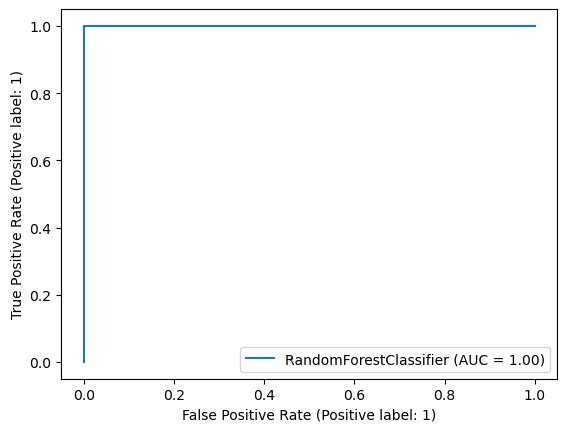

In [339]:
plt.figure(figsize=[2,2])
RocCurveDisplay.from_estimator(rfc, X_train, y_train)
plt.show()

## Grid Search to Find Optimal Hyperparameters (Hyperparameter Tuning)

In [346]:
# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100, n_jobs=-1)

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# parameters to build the model on
params = {
    'max_depth': [4,7, 8, 10, 12],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [20, 30, 50, 100,200],
    'max_features': [2,3,4],
}

# fit tree on training data
rf = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv = n_folds,
                           n_jobs=-1, verbose=1,  
                           return_train_score=True, 
                           scoring="accuracy")
rf.fit(X_train, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
0.9387444031628084
{'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 100}


__Note: Due to computational issues, not able to explore the full set of hyperparameters.__

In [347]:
# cross validation results
pd.DataFrame(rf.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth param_max_features param_min_samples_leaf param_n_estimators                                                                           params  split0_test_score  split1_test_score  split2_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  mean_train_score  std_train_score
0           0.30          0.13             0.20            0.05               4                  2                      5                 20   {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 20}               0.86               0.85               0.83             0.85            0.01              286                0.86                0.86                0.84              0.85             0.01
1           0.47          0.08             0.12            0.01               4                  2                      5                 30   {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 30}               0.86               0.85               0.84             0.85            0.01              282                0.86                0.86                0.85              0.86             0.01
2           0.90          0.11             0.32            0.03               4                  2                      5                 50   {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 50}               0.87               0.86               0.85             0.86            0.01              264                0.87                0.87                0.87              0.87             0.00
3           1.66          0.25             0.50            0.19               4                  2                      5                100  {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 100}               0.86               0.86               0.86             0.86            0.00              268                0.87                0.87                0.87              0.87             0.00
4           3.17          0.15             0.49            0.19               4                  2                      5                200  {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 200}               0.87               0.86               0.86             0.86            0.00              257                0.88                0.87                0.87              0.87             0.00

In [348]:
# print best hyperparameters
print("Best accuracy score: ", rf.best_score_)
print("Best hyperparameters: ", rf.best_params_)

Best accuracy score:  0.9387444031628084
Best hyperparameters:  {'max_depth': 12, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 100}


## Random Forest with Optimal Hyperparameters

In [349]:
rfc = RandomForestClassifier(class_weight = 'balanced',max_depth=12,min_samples_leaf=5,max_features=4,
                            n_estimators =100, random_state=100, oob_score=True, n_jobs=-1)

In [350]:
# fit
rfc.fit(X_train,y_train)
# predict
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6555
           1       0.47      0.49      0.48       443

    accuracy                           0.93      6998
   macro avg       0.72      0.72      0.72      6998
weighted avg       0.93      0.93      0.93      6998



In [351]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[6317  238]
 [ 228  215]]
sensitivity 	 0.49
specificity 	 0.96
accuracy 	 0.93
AUC:    	 0.9


<Figure size 200x200 with 0 Axes>

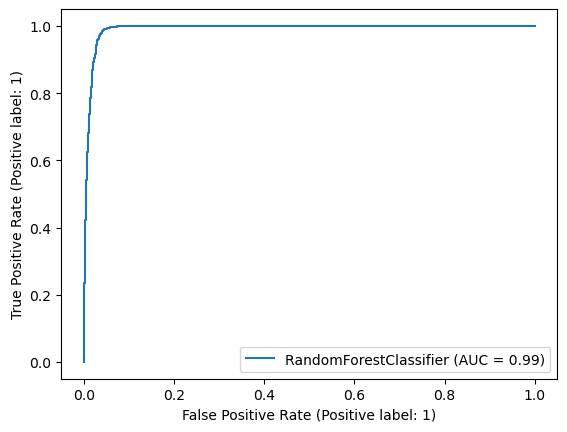

In [352]:
plt.figure(figsize=[2,2])
RocCurveDisplay.from_estimator(rfc, X_train, y_train)
plt.show()

# iii. Model 3: Gradient Boosting with PCA

Default Hyperparameters
Fitting a Gradient boosting model with the default hyperparameters will come first.

In [353]:
gb = GradientBoostingClassifier(random_state=100) # default

gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
print(classification_report(y_test,gb_predictions))
#gb.get_params()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6555
           1       0.58      0.26      0.36       443

    accuracy                           0.94      6998
   macro avg       0.77      0.63      0.67      6998
weighted avg       0.93      0.94      0.93      6998



In [354]:
print(accuracy_score(y_test, gb_predictions).round(2))

0.94


In [368]:
#create confusion matrix
cm = confusion_matrix(y_test,gb_predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

# check area under curve
y_pred_prob = gb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[6467   88]
 [ 312  131]]
sensitivity 	 0.3
specificity 	 0.99
accuracy 	 0.94
AUC:    	 0.91


## Grid Search to Find Optimal Hyperparameters (Hyperparameter Tuning)

In [357]:
# instantiate the model
gb = GradientBoostingClassifier( random_state=100)

# specify number of folds for k-fold CV
n_folds = 3

gb_params ={
#     'loss' : ['log_loss', 'exponential'],
     'n_estimators': [20,30, 50, 100],
     'learning_rate' : [0.1, 0.5, 1],
     'max_depth': [4,7,10,13],
     'min_samples_leaf': [10,20,50],
     'max_features': ['sqrt'], # Not considered as 'sqrt' works better than 'log2'
}

# fit tree on training data
gb = GridSearchCV(estimator=gb,
                  param_grid=gb_params,
                  cv = n_folds,
                  n_jobs=-1, verbose=1,
                  return_train_score=True,
                  scoring="accuracy")

#gb_predictions_prob = gb.predict_proba(test)
#gb_predictions_prob

__Note: Due to computational issues, not able to explore the full set of hyperparameters.__

In [359]:
# Fit the model to our train and target
gb.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [4, 7, 10, 13], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [20, 30, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [362]:
# cross validation results
pd.DataFrame(gb.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_learning_rate param_max_depth param_max_features param_min_samples_leaf param_n_estimators                                                                                                       params  split0_test_score  split1_test_score  split2_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  mean_train_score  std_train_score
0           1.63          0.01             0.01            0.01                0.10               4               sqrt                     10                 20   {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}               0.94               0.94               0.94             0.94            0.00               67                0.94                0.94                0.94              0.94             0.00
1           2.39          0.06             0.00            0.00                0.10               4               sqrt                     10                 30   {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}               0.94               0.94               0.94             0.94            0.00               59                0.95                0.95                0.95              0.95             0.00
2           4.04          0.08             0.01            0.00                0.10               4               sqrt                     10                 50   {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 50}               0.94               0.94               0.94             0.94            0.00               38                0.96                0.95                0.95              0.95             0.00
3           8.50          0.19             0.02            0.01                0.10               4               sqrt                     10                100  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}               0.94               0.95               0.94             0.94            0.00                8                0.96                0.96                0.96              0.96             0.00
4           1.68          0.01             0.00            0.00                0.10               4               sqrt                     20                 20   {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 20}               0.94               0.94               0.94             0.94            0.00               66                0.94                0.94                0.94              0.94             0.00

In [363]:
# print best hyperparameters
print("Best accuracy score: ", gb.best_score_)
print("Best hyperparameters: ", gb.best_params_)

Best accuracy score:  0.9442697913689626
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 100}


## Gradientboosting with Optimal Hyperparameters

In [407]:
gb = GradientBoostingClassifier(n_estimators = 100, max_depth=4, min_samples_leaf=50,
                                max_features ='sqrt',learning_rate=0.1, random_state=100)

# Fit the model to our train and target
gb.fit(X_train, y_train)

# Get our predictions
gb_predictions = gb.predict(X_test)
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6555
           1       0.59      0.25      0.35       443

    accuracy                           0.94      6998
   macro avg       0.77      0.62      0.66      6998
weighted avg       0.93      0.94      0.93      6998



In [408]:
print(accuracy_score(y_test, gb_predictions).round(2))

0.94


In [409]:
#create confusion matrix
cm = confusion_matrix(y_test,gb_predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

# check area under curve
y_pred_prob = gb.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[6479   76]
 [ 332  111]]
sensitivity 	 0.25
specificity 	 0.99
accuracy 	 0.94
AUC:    	 0.91


<Figure size 200x200 with 0 Axes>

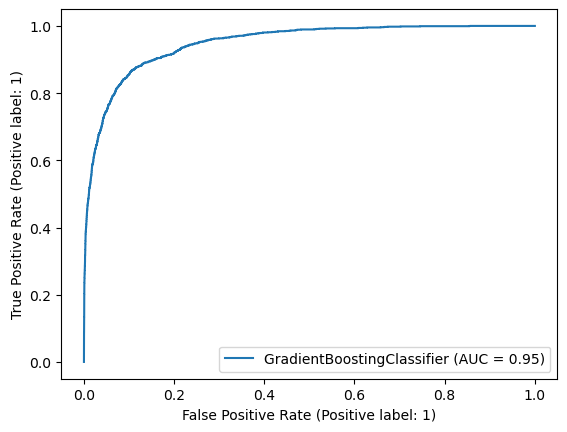

In [410]:
plt.figure(figsize=[2,2])
RocCurveDisplay.from_estimator(gb, X_train, y_train)
plt.show()

#  Results from the 3 models with PCA

The most crucial business statistic for the telecom churn issue is recall, as we are more intrested in finding out customers who wil churn i.e., True Positive. The company would like to identify the bulk of its customers, even if many of them are incorrectly classified as churning. The expense of churning is much more for the company than a few false positives.

Based on the score's from 3 models, it is clear that Logistic Regression is the best model this problem as it has high Recall value and commputationally time is very less. Thus, we can go with Logistic Regession Model for identifying the churn indicators. 

a) Logistic Regression
- Sensitivity/Recall  - .84
- Specificity         - .82
- Accuracy            - .82
- Roc AUC Score       - .9

b) Random Forest
- Sensitivity/Recall  - .49
- Specificity         - .96
- Accuracy            - .93
- Roc AUC Score       - .9

c) Gradient Boosting
- Sensitivity/Recall  - .25
- Specificity         - .99
- Accuracy            - .94
- Roc AUC Score       - .91

# Step 4- Conclusion

Out of all the models mentioned above, we opt for logistic regression because it requires less memory and has a lower time complexity. Furthermore, it has excellent sensitivity, which is our top priority in this case study.

# Step 5- Identifying the  churn indicators using Logistic Regression model for bussiness problem

Now let's create models to find the indicators of churn. Recognizing these churn indications will aid in keeping clients who are likely to leave.

In [381]:
# create a copy of dataset
Ft_elm = X.copy()
Ft_elm.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  3g_vbc_8  3g_vbc_7  3g_vbc_6  total_data_rech_6  total_data_rech_7  total_data_rech_8  total_amt_6  total_amt_7  total_amt_8  avg_rech_amt_yr  days_last_mobile_rech_for_6th_month  days_last_mobile_rech_for_7th_month  days_last_mobile_rech_for_8th_month  days_last_data_rech_for_6th_month  days_last_data_rech_for_7th_month  days_last_data_rech_for_8th_month  night_pck_user_6_0.0  night_pck_user_7_0.0  night_pck_user_8_0.0  fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  fb_user_8_1.0  age_group_2  age_group_3  age_group_4  age_group_5  age_group_6
4    -0.76   -1.24   -1.26        -0.63        -0.69        -0.68         -0.77         -0.85         -0.93           2.62          -0.33          -0.34           0.13          -0.34          -0.34             -0.57             -0.65             -0.63             -0.60             -0.74             -0.83              1.07             -0.36              0.16             -0.40              3.37             -0.43         -0.61         -0.78         -0.81             -0.50             -0.51             -0.50             -0.54             -0.57             -0.55             -0.33             -0.33             -0.32         -0.63         -0.67         -0.65         -0.56          1.47         -0.60           -0.87           -0.96           -0.98             -0.69             -0.78             -0.75             -0.86             -0.94             -0.80             -0.27             -0.38             -0.23         -0.86         -0.95         -0.84             -0.52             -0.53             -0.52             -0.61             -0.63             -0.62             -0.39             -0.39             -0.39         -0.66         -0.67         -0.66           -0.93           -1.02           -0.92         -0.31         -0.35         -0.36         -0.36              0.43             -0.07             -0.24             -0.72             -1.22             -1.19           -0.96           -1.10           -1.23               -0.75               -0.93               -0.64            -0.42            -0.26            -0.45             2.98  

## Test Train Split

In [388]:
# divide data into train and test
X_Ft_elm = Ft_elm
y_Ft_elm = y
X_train_Ft_elm, X_test_Ft_elm, y_train_Ft_elm, y_test_Ft_elm = train_test_split(X_Ft_elm, y_Ft_elm, test_size = 0.25, random_state = 100, stratify = y)
# print shapes of train and test sets
print(X_train_Ft_elm.shape)
print(y_train_Ft_elm.shape)
print(X_test_Ft_elm.shape)
print(y_test_Ft_elm.shape)

(20994, 149)
(20994,)
(6998, 149)
(6998,)


## VIF

In [389]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = X_train_Ft_elm.columns
    vif["VIF"] = [variance_inflation_factor(X_train_Ft_elm.values, i) for i in range(X_train_Ft_elm.shape[1])]
    return vif

vif = calculate_vif(X_train_Ft_elm)

while vif["VIF"].max() > 5:
    remove_index = vif["VIF"].idxmax()
    X_train_Ft_elm = X_train_Ft_elm.drop(X_train_Ft_elm.columns[remove_index], axis=1)
    vif = calculate_vif(X_train_Ft_elm)
    print(vif)

print(X_train_Ft_elm.head())

                               variables    VIF
0                                 arpu_6  13.79
1                                 arpu_7  14.84
2                                 arpu_8  13.05
3                            onnet_mou_6  30.69
4                            onnet_mou_7  43.28
5                            onnet_mou_8  39.79
6                           offnet_mou_6  27.84
7                           offnet_mou_7  39.27
8                           offnet_mou_8  35.12
9                          roam_ic_mou_6   4.27
10                         roam_ic_mou_7   4.54
11                         roam_ic_mou_8   4.65
12                         roam_og_mou_6   4.88
13                         roam_og_mou_7   4.80
14                         roam_og_mou_8   4.92
15                      loc_og_t2t_mou_6  11.46
16                      loc_og_t2t_mou_7  13.78
17                      loc_og_t2t_mou_8  11.89
18                      loc_og_t2m_mou_6  29.98
19                      loc_og_t2m_mou_7

                               variables    VIF
0                                 arpu_6  13.79
1                                 arpu_7  14.84
2                                 arpu_8  13.05
3                            onnet_mou_6  30.69
4                            onnet_mou_7  43.28
5                            onnet_mou_8  39.79
6                           offnet_mou_6  27.84
7                           offnet_mou_7  39.27
8                           offnet_mou_8  35.12
9                          roam_ic_mou_6   4.27
10                         roam_ic_mou_7   4.54
11                         roam_ic_mou_8   4.65
12                         roam_og_mou_6   4.88
13                         roam_og_mou_7   4.80
14                         roam_og_mou_8   4.92
15                      loc_og_t2t_mou_6  11.46
16                      loc_og_t2t_mou_7  13.78
17                      loc_og_t2t_mou_8  11.89
18                      loc_og_t2m_mou_6  29.98
19                      loc_og_t2m_mou_7

                               variables    VIF
0                                 arpu_6  13.79
1                                 arpu_7  14.83
2                                 arpu_8  13.04
3                            onnet_mou_6  30.69
4                            onnet_mou_7  43.28
5                            onnet_mou_8  39.79
6                           offnet_mou_6  27.84
7                           offnet_mou_7  39.27
8                           offnet_mou_8  35.12
9                          roam_ic_mou_6   4.26
10                         roam_ic_mou_7   4.54
11                         roam_ic_mou_8   4.65
12                         roam_og_mou_6   4.88
13                         roam_og_mou_7   4.80
14                         roam_og_mou_8   4.92
15                      loc_og_t2t_mou_6  11.46
16                      loc_og_t2t_mou_7  13.78
17                      loc_og_t2t_mou_8  11.89
18                      loc_og_t2m_mou_6  29.98
19                      loc_og_t2m_mou_7

                               variables   VIF
0                                 arpu_6 13.78
1                                 arpu_7 14.82
2                                 arpu_8 13.04
3                            onnet_mou_6 30.60
4                            onnet_mou_7 40.03
5                            onnet_mou_8 39.46
6                           offnet_mou_6 27.74
7                           offnet_mou_7 36.66
8                           offnet_mou_8 34.75
9                          roam_ic_mou_6  4.26
10                         roam_ic_mou_7  4.54
11                         roam_ic_mou_8  4.65
12                         roam_og_mou_6  4.87
13                         roam_og_mou_7  4.77
14                         roam_og_mou_8  4.92
15                      loc_og_t2t_mou_6 11.45
16                      loc_og_t2t_mou_7 13.73
17                      loc_og_t2t_mou_8 11.89
18                      loc_og_t2m_mou_6 29.96
19                      loc_og_t2m_mou_7 35.61
20           

                               variables   VIF
0                                 arpu_6 13.78
1                                 arpu_7 14.82
2                                 arpu_8 13.02
3                            onnet_mou_6 30.39
4                            onnet_mou_7 40.03
5                            onnet_mou_8 35.83
6                           offnet_mou_6 27.65
7                           offnet_mou_7 36.65
8                           offnet_mou_8 31.64
9                          roam_ic_mou_6  4.26
10                         roam_ic_mou_7  4.54
11                         roam_ic_mou_8  4.65
12                         roam_og_mou_6  4.87
13                         roam_og_mou_7  4.77
14                         roam_og_mou_8  4.88
15                      loc_og_t2t_mou_6 11.43
16                      loc_og_t2t_mou_7 13.70
17                      loc_og_t2t_mou_8 11.81
18                      loc_og_t2m_mou_6 29.91
19                      loc_og_t2m_mou_7 35.57
20           

                               variables   VIF
0                                 arpu_6 13.76
1                                 arpu_7 14.81
2                                 arpu_8 13.02
3                            onnet_mou_6 28.77
4                            onnet_mou_7 36.73
5                            onnet_mou_8 35.32
6                           offnet_mou_6 26.25
7                           offnet_mou_7 35.92
8                           offnet_mou_8 31.44
9                          roam_ic_mou_6  4.26
10                         roam_ic_mou_7  4.54
11                         roam_ic_mou_8  4.65
12                         roam_og_mou_6  4.85
13                         roam_og_mou_7  4.75
14                         roam_og_mou_8  4.88
15                      loc_og_t2t_mou_6 10.73
16                      loc_og_t2t_mou_7  9.08
17                      loc_og_t2t_mou_8 11.13
18                      loc_og_t2m_mou_6 26.61
19                      loc_og_t2m_mou_7 14.09
20           

                               variables   VIF
0                                 arpu_6 13.75
1                                 arpu_7 14.81
2                                 arpu_8 13.01
3                            onnet_mou_6 28.27
4                            onnet_mou_7 36.66
5                            onnet_mou_8 32.27
6                           offnet_mou_6 26.16
7                           offnet_mou_7 35.90
8                           offnet_mou_8 31.11
9                          roam_ic_mou_6  4.26
10                         roam_ic_mou_7  4.53
11                         roam_ic_mou_8  4.64
12                         roam_og_mou_6  4.85
13                         roam_og_mou_7  4.75
14                         roam_og_mou_8  4.87
15                      loc_og_t2t_mou_6  9.92
16                      loc_og_t2t_mou_7  9.08
17                      loc_og_t2t_mou_8  7.91
18                      loc_og_t2m_mou_6 23.24
19                      loc_og_t2m_mou_7 14.08
20           

                               variables   VIF
0                                 arpu_6 13.74
1                                 arpu_7 14.77
2                                 arpu_8 13.00
3                            onnet_mou_6 24.15
4                            onnet_mou_8 26.22
5                           offnet_mou_6 26.14
6                           offnet_mou_7 35.20
7                           offnet_mou_8 31.05
8                          roam_ic_mou_6  4.26
9                          roam_ic_mou_7  4.53
10                         roam_ic_mou_8  4.64
11                         roam_og_mou_6  4.84
12                         roam_og_mou_7  4.67
13                         roam_og_mou_8  4.87
14                      loc_og_t2t_mou_6  9.61
15                      loc_og_t2t_mou_7  6.97
16                      loc_og_t2t_mou_8  7.58
17                      loc_og_t2m_mou_6 23.16
18                      loc_og_t2m_mou_7 13.90
19                      loc_og_t2m_mou_8 11.81
20           

                               variables   VIF
0                                 arpu_6 13.71
1                                 arpu_7 14.68
2                                 arpu_8 12.94
3                            onnet_mou_6 24.12
4                            onnet_mou_8 26.18
5                           offnet_mou_6 22.95
6                           offnet_mou_8 25.04
7                          roam_ic_mou_6  4.26
8                          roam_ic_mou_7  4.53
9                          roam_ic_mou_8  4.64
10                         roam_og_mou_6  4.83
11                         roam_og_mou_7  4.58
12                         roam_og_mou_8  4.86
13                      loc_og_t2t_mou_6  9.56
14                      loc_og_t2t_mou_7  6.76
15                      loc_og_t2t_mou_8  7.53
16                      loc_og_t2m_mou_6 22.77
17                      loc_og_t2m_mou_7  8.85
18                      loc_og_t2m_mou_8 10.89
19                      loc_og_t2f_mou_6  2.81
20           

                               variables   VIF
0                                 arpu_6 13.68
1                                 arpu_7 14.63
2                                 arpu_8 12.93
3                            onnet_mou_6 21.84
4                            onnet_mou_8 26.12
5                           offnet_mou_6 22.87
6                           offnet_mou_8 24.99
7                          roam_ic_mou_6  4.26
8                          roam_ic_mou_7  4.53
9                          roam_ic_mou_8  4.64
10                         roam_og_mou_6  4.81
11                         roam_og_mou_7  4.57
12                         roam_og_mou_8  4.86
13                      loc_og_t2t_mou_6  7.20
14                      loc_og_t2t_mou_7  6.75
15                      loc_og_t2t_mou_8  7.53
16                      loc_og_t2m_mou_6 10.38
17                      loc_og_t2m_mou_7  8.85
18                      loc_og_t2m_mou_8 10.89
19                      loc_og_t2f_mou_6  2.78
20           

                               variables   VIF
0                                 arpu_6 13.65
1                                 arpu_7 14.62
2                                 arpu_8 12.91
3                            onnet_mou_6 18.09
4                           offnet_mou_6 22.53
5                           offnet_mou_8 23.90
6                          roam_ic_mou_6  4.26
7                          roam_ic_mou_7  4.53
8                          roam_ic_mou_8  4.64
9                          roam_og_mou_6  4.79
10                         roam_og_mou_7  4.57
11                         roam_og_mou_8  4.75
12                      loc_og_t2t_mou_6  6.94
13                      loc_og_t2t_mou_7  6.75
14                      loc_og_t2t_mou_8  5.66
15                      loc_og_t2m_mou_6 10.31
16                      loc_og_t2m_mou_7  8.83
17                      loc_og_t2m_mou_8 10.75
18                      loc_og_t2f_mou_6  2.78
19                      loc_og_t2f_mou_7  3.11
20           

                               variables   VIF
0                                 arpu_6 13.38
1                                 arpu_7 14.57
2                                 arpu_8 12.84
3                            onnet_mou_6 14.89
4                           offnet_mou_6 16.24
5                          roam_ic_mou_6  4.26
6                          roam_ic_mou_7  4.53
7                          roam_ic_mou_8  4.63
8                          roam_og_mou_6  4.56
9                          roam_og_mou_7  4.57
10                         roam_og_mou_8  4.64
11                      loc_og_t2t_mou_6  6.83
12                      loc_og_t2t_mou_7  6.67
13                      loc_og_t2t_mou_8  5.48
14                      loc_og_t2m_mou_6  9.55
15                      loc_og_t2m_mou_7  8.59
16                      loc_og_t2m_mou_8  7.03
17                      loc_og_t2f_mou_6  2.77
18                      loc_og_t2f_mou_7  3.11
19                      loc_og_t2f_mou_8  2.84
20           

                               variables   VIF
0                                 arpu_6 13.35
1                                 arpu_7 14.24
2                                 arpu_8 12.77
3                            onnet_mou_6 13.90
4                           offnet_mou_6 15.65
5                          roam_ic_mou_6  4.26
6                          roam_ic_mou_7  4.52
7                          roam_ic_mou_8  4.63
8                          roam_og_mou_6  4.53
9                          roam_og_mou_7  4.56
10                         roam_og_mou_8  4.63
11                      loc_og_t2t_mou_6  6.77
12                      loc_og_t2t_mou_7  6.20
13                      loc_og_t2t_mou_8  5.37
14                      loc_og_t2m_mou_6  9.45
15                      loc_og_t2m_mou_7  7.33
16                      loc_og_t2m_mou_8  6.62
17                      loc_og_t2f_mou_6  2.77
18                      loc_og_t2f_mou_7  3.11
19                      loc_og_t2f_mou_8  2.84
20           

                               variables   VIF
0                                 arpu_6 13.35
1                                 arpu_7 14.23
2                                 arpu_8 12.76
3                            onnet_mou_6 13.89
4                           offnet_mou_6 15.65
5                          roam_ic_mou_6  4.26
6                          roam_ic_mou_7  4.52
7                          roam_ic_mou_8  4.63
8                          roam_og_mou_6  4.53
9                          roam_og_mou_7  4.56
10                         roam_og_mou_8  4.63
11                      loc_og_t2t_mou_6  6.76
12                      loc_og_t2t_mou_7  6.20
13                      loc_og_t2t_mou_8  5.37
14                      loc_og_t2m_mou_6  9.45
15                      loc_og_t2m_mou_7  7.33
16                      loc_og_t2m_mou_8  6.62
17                      loc_og_t2f_mou_6  2.77
18                      loc_og_t2f_mou_7  3.11
19                      loc_og_t2f_mou_8  2.84
20           

                               variables   VIF
0                                 arpu_6 13.35
1                                 arpu_7 14.22
2                                 arpu_8 12.76
3                            onnet_mou_6 13.89
4                           offnet_mou_6 15.65
5                          roam_ic_mou_6  4.26
6                          roam_ic_mou_7  4.52
7                          roam_ic_mou_8  4.63
8                          roam_og_mou_6  4.53
9                          roam_og_mou_7  4.56
10                         roam_og_mou_8  4.63
11                      loc_og_t2t_mou_6  6.76
12                      loc_og_t2t_mou_7  6.20
13                      loc_og_t2t_mou_8  5.37
14                      loc_og_t2m_mou_6  9.45
15                      loc_og_t2m_mou_7  7.33
16                      loc_og_t2m_mou_8  6.62
17                      loc_og_t2f_mou_6  2.77
18                      loc_og_t2f_mou_7  3.11
19                      loc_og_t2f_mou_8  2.84
20           

                               variables   VIF
0                                 arpu_6 12.10
1                                 arpu_7  6.86
2                                 arpu_8 12.04
3                            onnet_mou_6 13.83
4                          roam_ic_mou_6  4.25
5                          roam_ic_mou_7  4.52
6                          roam_ic_mou_8  4.63
7                          roam_og_mou_6  4.46
8                          roam_og_mou_7  4.55
9                          roam_og_mou_8  4.63
10                      loc_og_t2t_mou_6  6.76
11                      loc_og_t2t_mou_7  6.20
12                      loc_og_t2t_mou_8  5.35
13                      loc_og_t2m_mou_6  5.92
14                      loc_og_t2m_mou_7  7.29
15                      loc_og_t2m_mou_8  6.60
16                      loc_og_t2f_mou_6  2.76
17                      loc_og_t2f_mou_7  3.11
18                      loc_og_t2f_mou_8  2.84
19                      loc_og_t2c_mou_6  1.70
20           

                               variables   VIF
0                                 arpu_6 12.10
1                                 arpu_7  6.86
2                                 arpu_8 11.96
3                            onnet_mou_6 13.82
4                          roam_ic_mou_6  4.25
5                          roam_ic_mou_7  4.52
6                          roam_ic_mou_8  4.63
7                          roam_og_mou_6  4.46
8                          roam_og_mou_7  4.55
9                          roam_og_mou_8  4.62
10                      loc_og_t2t_mou_6  6.76
11                      loc_og_t2t_mou_7  6.20
12                      loc_og_t2t_mou_8  5.35
13                      loc_og_t2m_mou_6  5.92
14                      loc_og_t2m_mou_7  7.29
15                      loc_og_t2m_mou_8  6.60
16                      loc_og_t2f_mou_6  2.76
17                      loc_og_t2f_mou_7  3.11
18                      loc_og_t2f_mou_8  2.84
19                      loc_og_t2c_mou_6  1.70
20           

                               variables   VIF
0                                 arpu_6  6.13
1                                 arpu_7  6.66
2                                 arpu_8 11.91
3                          roam_ic_mou_6  4.25
4                          roam_ic_mou_7  4.51
5                          roam_ic_mou_8  4.63
6                          roam_og_mou_6  4.41
7                          roam_og_mou_7  4.54
8                          roam_og_mou_8  4.62
9                       loc_og_t2t_mou_6  4.76
10                      loc_og_t2t_mou_7  6.16
11                      loc_og_t2t_mou_8  5.35
12                      loc_og_t2m_mou_6  5.84
13                      loc_og_t2m_mou_7  7.28
14                      loc_og_t2m_mou_8  6.53
15                      loc_og_t2f_mou_6  2.76
16                      loc_og_t2f_mou_7  3.11
17                      loc_og_t2f_mou_8  2.84
18                      loc_og_t2c_mou_6  1.70
19                      loc_og_t2c_mou_7  1.82
20           

                               variables   VIF
0                                 arpu_6  6.11
1                                 arpu_7  6.43
2                                 arpu_8  6.62
3                          roam_ic_mou_6  4.25
4                          roam_ic_mou_7  4.51
5                          roam_ic_mou_8  4.63
6                          roam_og_mou_6  4.41
7                          roam_og_mou_7  4.54
8                          roam_og_mou_8  4.62
9                       loc_og_t2t_mou_6  4.76
10                      loc_og_t2t_mou_7  6.16
11                      loc_og_t2t_mou_8  5.35
12                      loc_og_t2m_mou_6  5.83
13                      loc_og_t2m_mou_7  7.27
14                      loc_og_t2m_mou_8  6.53
15                      loc_og_t2f_mou_6  2.76
16                      loc_og_t2f_mou_7  3.10
17                      loc_og_t2f_mou_8  2.83
18                      loc_og_t2c_mou_6  1.70
19                      loc_og_t2c_mou_7  1.82
20           

                               variables   VIF
0                                 arpu_6  6.11
1                                 arpu_7  6.42
2                                 arpu_8  6.60
3                          roam_ic_mou_6  4.25
4                          roam_ic_mou_7  4.51
5                          roam_ic_mou_8  4.63
6                          roam_og_mou_6  4.40
7                          roam_og_mou_7  4.54
8                          roam_og_mou_8  4.62
9                       loc_og_t2t_mou_6  4.76
10                      loc_og_t2t_mou_7  6.16
11                      loc_og_t2t_mou_8  5.35
12                      loc_og_t2m_mou_6  5.83
13                      loc_og_t2m_mou_7  7.27
14                      loc_og_t2m_mou_8  6.52
15                      loc_og_t2f_mou_6  2.76
16                      loc_og_t2f_mou_7  3.10
17                      loc_og_t2f_mou_8  2.83
18                      loc_og_t2c_mou_6  1.70
19                      loc_og_t2c_mou_7  1.82
20           

                               variables   VIF
0                                 arpu_6  6.10
1                                 arpu_7  6.41
2                                 arpu_8  6.60
3                          roam_ic_mou_6  4.25
4                          roam_ic_mou_7  4.51
5                          roam_ic_mou_8  4.63
6                          roam_og_mou_6  4.40
7                          roam_og_mou_7  4.54
8                          roam_og_mou_8  4.62
9                       loc_og_t2t_mou_6  4.76
10                      loc_og_t2t_mou_7  6.16
11                      loc_og_t2t_mou_8  5.35
12                      loc_og_t2m_mou_6  5.83
13                      loc_og_t2m_mou_7  7.27
14                      loc_og_t2m_mou_8  6.52
15                      loc_og_t2f_mou_6  2.76
16                      loc_og_t2f_mou_7  3.10
17                      loc_og_t2f_mou_8  2.83
18                      loc_og_t2c_mou_6  1.70
19                      loc_og_t2c_mou_7  1.82
20           

                               variables   VIF
0                                 arpu_6  5.72
1                                 arpu_7  5.77
2                                 arpu_8  6.12
3                          roam_ic_mou_6  4.25
4                          roam_ic_mou_7  4.51
5                          roam_ic_mou_8  4.63
6                          roam_og_mou_6  4.40
7                          roam_og_mou_7  4.54
8                          roam_og_mou_8  4.62
9                       loc_og_t2t_mou_6  4.76
10                      loc_og_t2t_mou_7  6.16
11                      loc_og_t2t_mou_8  5.35
12                      loc_og_t2m_mou_6  5.83
13                      loc_og_t2m_mou_7  7.27
14                      loc_og_t2m_mou_8  6.52
15                      loc_og_t2f_mou_6  2.76
16                      loc_og_t2f_mou_7  3.10
17                      loc_og_t2f_mou_8  2.83
18                      loc_og_t2c_mou_6  1.70
19                      loc_og_t2c_mou_7  1.82
20           

                               variables  VIF
0                                 arpu_6 5.72
1                                 arpu_7 5.76
2                                 arpu_8 5.73
3                          roam_ic_mou_6 4.25
4                          roam_ic_mou_7 4.51
5                          roam_ic_mou_8 4.62
6                          roam_og_mou_6 4.40
7                          roam_og_mou_7 4.54
8                          roam_og_mou_8 4.61
9                       loc_og_t2t_mou_6 4.75
10                      loc_og_t2t_mou_7 6.15
11                      loc_og_t2t_mou_8 4.95
12                      loc_og_t2m_mou_6 5.82
13                      loc_og_t2m_mou_7 7.26
14                      loc_og_t2m_mou_8 5.93
15                      loc_og_t2f_mou_6 2.76
16                      loc_og_t2f_mou_7 3.10
17                      loc_og_t2f_mou_8 2.83
18                      loc_og_t2c_mou_6 1.70
19                      loc_og_t2c_mou_7 1.82
20                      loc_og_t2c

                               variables  VIF
0                                 arpu_6 5.67
1                                 arpu_7 5.38
2                                 arpu_8 5.67
3                          roam_ic_mou_6 4.25
4                          roam_ic_mou_7 4.51
5                          roam_ic_mou_8 4.62
6                          roam_og_mou_6 4.40
7                          roam_og_mou_7 4.53
8                          roam_og_mou_8 4.61
9                       loc_og_t2t_mou_6 4.74
10                      loc_og_t2t_mou_7 6.06
11                      loc_og_t2t_mou_8 4.93
12                      loc_og_t2m_mou_6 4.46
13                      loc_og_t2m_mou_8 4.38
14                      loc_og_t2f_mou_6 2.76
15                      loc_og_t2f_mou_7 3.08
16                      loc_og_t2f_mou_8 2.83
17                      loc_og_t2c_mou_6 1.70
18                      loc_og_t2c_mou_7 1.82
19                      loc_og_t2c_mou_8 1.81
20                      std_og_t2t

                              variables  VIF
0                                arpu_6 5.60
1                                arpu_7 4.88
2                                arpu_8 5.61
3                         roam_ic_mou_6 4.25
4                         roam_ic_mou_7 4.49
5                         roam_ic_mou_8 4.62
6                         roam_og_mou_6 4.39
7                         roam_og_mou_7 4.52
8                         roam_og_mou_8 4.61
9                      loc_og_t2t_mou_6 3.59
10                     loc_og_t2t_mou_8 3.57
11                     loc_og_t2m_mou_6 4.46
12                     loc_og_t2m_mou_8 4.38
13                     loc_og_t2f_mou_6 2.76
14                     loc_og_t2f_mou_7 3.07
15                     loc_og_t2f_mou_8 2.83
16                     loc_og_t2c_mou_6 1.70
17                     loc_og_t2c_mou_7 1.82
18                     loc_og_t2c_mou_8 1.81
19                     std_og_t2t_mou_6 2.88
20                     std_og_t2t_mou_8 2.94
21        

                              variables  VIF
0                                arpu_6 5.56
1                                arpu_7 4.44
2                                arpu_8 5.53
3                         roam_ic_mou_6 4.25
4                         roam_ic_mou_7 4.49
5                         roam_ic_mou_8 4.62
6                         roam_og_mou_6 4.39
7                         roam_og_mou_7 4.50
8                         roam_og_mou_8 4.60
9                      loc_og_t2t_mou_6 3.59
10                     loc_og_t2t_mou_8 3.57
11                     loc_og_t2m_mou_6 4.46
12                     loc_og_t2m_mou_8 4.38
13                     loc_og_t2f_mou_6 2.76
14                     loc_og_t2f_mou_7 3.07
15                     loc_og_t2f_mou_8 2.83
16                     loc_og_t2c_mou_6 1.70
17                     loc_og_t2c_mou_7 1.82
18                     loc_og_t2c_mou_8 1.81
19                     std_og_t2t_mou_6 2.87
20                     std_og_t2t_mou_8 2.93
21        

                              variables  VIF
0                                arpu_7 4.05
1                                arpu_8 5.08
2                         roam_ic_mou_6 4.24
3                         roam_ic_mou_7 4.48
4                         roam_ic_mou_8 4.62
5                         roam_og_mou_6 4.28
6                         roam_og_mou_7 4.49
7                         roam_og_mou_8 4.59
8                      loc_og_t2t_mou_6 3.51
9                      loc_og_t2t_mou_8 3.55
10                     loc_og_t2m_mou_6 4.14
11                     loc_og_t2m_mou_8 4.30
12                     loc_og_t2f_mou_6 2.74
13                     loc_og_t2f_mou_7 3.05
14                     loc_og_t2f_mou_8 2.83
15                     loc_og_t2c_mou_6 1.70
16                     loc_og_t2c_mou_7 1.82
17                     loc_og_t2c_mou_8 1.81
18                     std_og_t2t_mou_6 2.60
19                     std_og_t2t_mou_8 2.86
20                     std_og_t2m_mou_6 2.51
21        

                              variables  VIF
0                                arpu_7 3.94
1                                arpu_8 4.91
2                         roam_ic_mou_6 4.24
3                         roam_ic_mou_7 4.48
4                         roam_ic_mou_8 4.62
5                         roam_og_mou_6 4.28
6                         roam_og_mou_7 4.49
7                         roam_og_mou_8 4.59
8                      loc_og_t2t_mou_6 3.51
9                      loc_og_t2t_mou_8 3.55
10                     loc_og_t2m_mou_6 4.14
11                     loc_og_t2m_mou_8 4.29
12                     loc_og_t2f_mou_6 2.74
13                     loc_og_t2f_mou_7 3.05
14                     loc_og_t2f_mou_8 2.83
15                     loc_og_t2c_mou_6 1.70
16                     loc_og_t2c_mou_7 1.82
17                     loc_og_t2c_mou_8 1.81
18                     std_og_t2t_mou_6 2.60
19                     std_og_t2t_mou_8 2.84
20                     std_og_t2m_mou_6 2.51
21        

In [390]:
vif_fts= list(vif['variables'])
#print(vif_fts)
print(len(vif_fts))
X_train_Ft_elm_new = X_train_Ft_elm[vif_fts]
X_test_Ft_elm_new = X_test_Ft_elm[vif_fts]

94


## Running Your First Training Model

In [391]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train_Ft_elm,(sm.add_constant(X_train_Ft_elm_new)), family = sm.families.Binomial())
                
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20994
Model:                            GLM   Df Residuals:                    20899
Model Family:                Binomial   Df Model:                           94
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3206.3
Date:                Thu, 06 Jul 2023   Deviance:                       6412.6
Time:                        13:35:09   Pearson chi2:                 2.83e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1534
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.3713      0.170    -25.660      0.000      -4.705      -4.037
arpu_7                                  0.2727      0.058      4.687      0.000       0.159       0.387
arpu_8                                  0.3156      0.074      4.251      0.000       0.170       0.461
roam_ic_mou_6                           0.0280      0.063      0.444      0.657      -0.096       0.151
roam_ic_mou_7                           0.0820      0.058      1.421      0.155      -0.031       0.195
roam_ic_mou_8                          -0.0464      0.054     -0.856      0.392      -0.153       0.060
roam_og_mou_6                           0.1031      0.060      1.712      0.087      -0.015       0.221
roam_og_mou_7                          -0.0707      0.055     -1.297      0.195      -0.177       0.036
roam_og_mou_8                           0.2334      0.049      4.729      0.000       0.137       0.330
loc_og_t2t_mou_6                       -0.0444      0.070     -0.636      0.524      -0.181       0.092
loc_og_t2t_mou_8                       -0.1997      0.092     -2.177      0.029      -0.379      -0.020
loc_og_t2m_mou_6                       -0.0269      0.072     -0.373      0.709      -0.168       0.114
loc_og_t2m_mou_8                       -0.3247      0.100     -3.247      0.001      -0.521      -0.129
loc_og_t2f_mou_6                       -0.0825      0.064     -1.296      0.195      -0.207       0.042
loc_og_t2f_mou_7                       -0.0330      0.071     -0.467      0.641      -0.172       0.106
loc_og_t2f_mou_8                        0.0849      0.073      1.165      0.244      -0.058       0.228
loc_og_t2c_mou_6                       -0.0208      0.042     -0.495      0.621      -0.103       0.062
loc_og_t2c_mou_7                        0.0075      0.044      0.171      0.864      -0.078       0.093
loc_og_t2c_mou_8                        0.0472      0.051      0.917      0.359      -0.054       0.148
std_og_t2t_mou_6                        0.0750      0.041      1.837      0.066      -0.005       0.155
std_og_t2t_mou_8                       -0.2793      0.056     -4.972      0.000      -0.389      -0.169
std_og_t2m_mou_6                        0.0560      0.041      1.362      0.173      -0.025       0.136
std_og_t2m_mou_8                       -0.2073      0.056     -3.679      0.000      -0.318      -0.097
std_og_t2f_mou_6                       -0.0575      0.051     -1.121      0.262      -0.158       0.043
std_og_t2f_mou_7                        0.0594      0.051      1.156      0.248      -0.041       0.160
std_og_t2f_mou_8                       -0.0812      0.063     -1.299      0.194      -0.204       0.041
spl_og_mou_6                            0.0054      0.045      0.11

<Axes: >

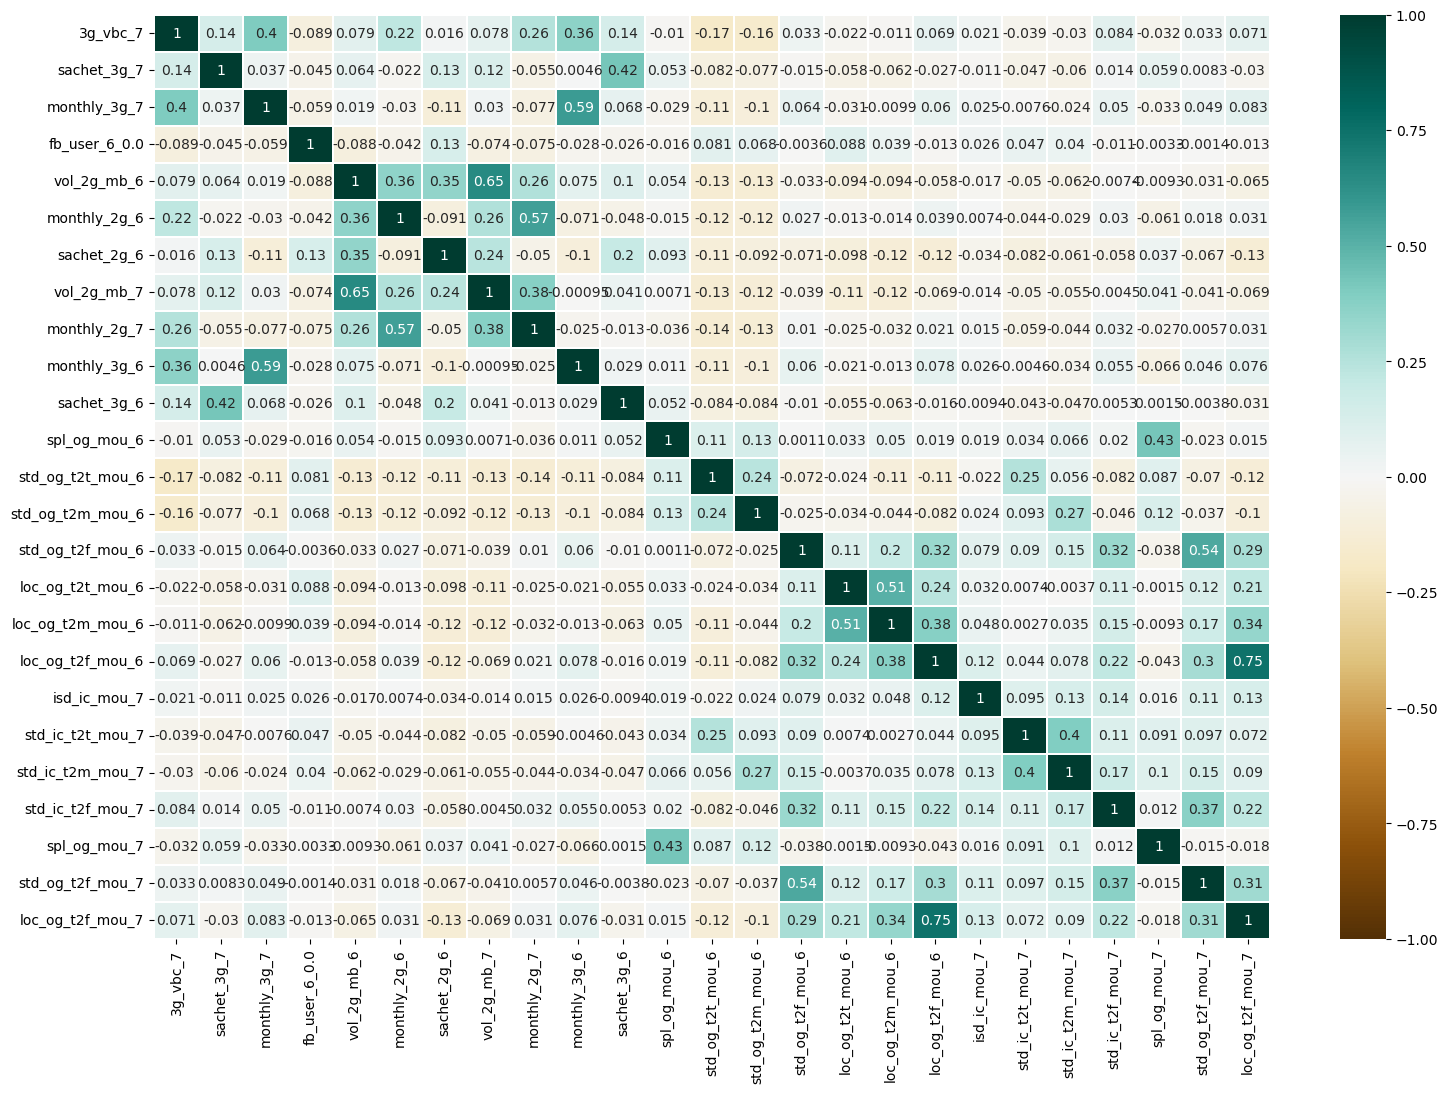

In [393]:
corr_cols = ['3g_vbc_7','sachet_3g_7','monthly_3g_7','fb_user_6_0.0','vol_2g_mb_6','monthly_2g_6','sachet_2g_6','vol_2g_mb_7','monthly_2g_7','monthly_3g_6','sachet_3g_6','spl_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','isd_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','spl_og_mou_7','std_og_t2f_mou_7','loc_og_t2f_mou_7']
plt.figure(figsize=[18,12])
sns.heatmap(X_test_Ft_elm_new[corr_cols].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

In [394]:
X_train_Ft_elm_new.drop(['vol_2g_mb_7', 'loc_og_t2f_mou_7','isd_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],1,inplace=True)

In [395]:
X_test_Ft_elm_new.drop(['vol_2g_mb_7', 'loc_og_t2f_mou_7','isd_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],1,inplace=True)

## Feature elemiation using RFE

From PCA using Logistic Regression model, RECALL score of 94% is achieved using 30 features. So, using RFE top 30 important features is extracted.

In [396]:
lrf = LogisticRegression()

# Fit the model using lr.fit()
lrf.fit(X_train_Ft_elm_new, y_train_Ft_elm)

rfe = RFE(lrf, n_features_to_select = 50)        # running RFE
rfe = rfe.fit(X_train_Ft_elm_new, y_train_Ft_elm)
list(zip(X_train_Ft_elm_new.columns,rfe.support_,rfe.ranking_))

[('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('roam_ic_mou_6', False, 26),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 18),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 15),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 28),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 31),
 ('loc_og_t2c_mou_7', False, 35),
 ('loc_og_t2c_mou_8', False, 21),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 9),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 8),
 ('std_og_t2f_mou_7', False, 7),
 ('std_og_t2f_mou_8', True, 1),
 ('spl_og_mou_6', False, 38),
 ('spl_og_mou_7', False, 23),
 ('spl_og_mou_8', False, 22),
 ('loc_ic_t2t_mou_6', False, 36),
 ('loc_ic_t2t_mou_7', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_6', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 

In [397]:
print(len(X_train_Ft_elm_new.columns[~rfe.support_]))
col = X_train_Ft_elm_new.columns[rfe.support_]
#print(col)

38


In [398]:
X_train_Ft_elm_new_1 = X_train_Ft_elm_new[col]
print(X_train_Ft_elm_new_1.shape)
X_test_Ft_elm_new_1 = X_test_Ft_elm_new[col]
print(X_test_Ft_elm_new_1.shape)

(20994, 50)
(6998, 50)


In [399]:
logm2 = sm.GLM(y_train_Ft_elm,(sm.add_constant(X_train_Ft_elm_new_1)), family = sm.families.Binomial())          
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20994
Model:                            GLM   Df Residuals:                    20943
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3225.9
Date:                Thu, 06 Jul 2023   Deviance:                       6451.7
Time:                        13:40:02   Pearson chi2:                 2.82e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1518
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.2544      0.079    -53.893      0.000      -4.409      -4.100
arpu_7                                  0.3177      0.041      7.698      0.000       0.237       0.399
arpu_8                                  0.2879      0.071      4.040      0.000       0.148       0.428
roam_ic_mou_7                           0.0712      0.053      1.339      0.181      -0.033       0.175
roam_og_mou_6                           0.1216      0.033      3.681      0.000       0.057       0.186
roam_og_mou_7                          -0.0802      0.053     -1.518      0.129      -0.184       0.023
roam_og_mou_8                           0.2076      0.031      6.668      0.000       0.147       0.269
loc_og_t2t_mou_8                       -0.2389      0.079     -3.008      0.003      -0.395      -0.083
loc_og_t2m_mou_8                       -0.3616      0.088     -4.121      0.000      -0.533      -0.190
loc_og_t2f_mou_6                       -0.0894      0.055     -1.623      0.105      -0.197       0.019
loc_og_t2f_mou_8                        0.0661      0.066      0.995      0.320      -0.064       0.196
std_og_t2t_mou_6                        0.0834      0.036      2.347      0.019       0.014       0.153
std_og_t2t_mou_8                       -0.3009      0.053     -5.678      0.000      -0.405      -0.197
std_og_t2m_mou_8                       -0.1842      0.048     -3.848      0.000      -0.278      -0.090
std_og_t2f_mou_8                       -0.0664      0.057     -1.174      0.240      -0.177       0.044
loc_ic_t2t_mou_7                        0.1251      0.065      1.913      0.056      -0.003       0.253
loc_ic_t2t_mou_8                       -0.4242      0.099     -4.266      0.000      -0.619      -0.229
loc_ic_t2m_mou_6                        0.2615      0.055      4.729      0.000       0.153       0.370
loc_ic_t2m_mou_8                       -0.8058      0.107     -7.557      0.000      -1.015      -0.597
loc_ic_t2f_mou_7                        0.0900      0.071      1.274      0.203      -0.048       0.228
loc_ic_t2f_mou_8                       -0.2508      0.092     -2.724      0.006      -0.431      -0.070
std_ic_t2m_mou_6                        0.1632      0.039      4.170      0.000       0.086       0.240
std_ic_t2m_mou_8                       -0.2962      0.058     -5.065      0.000      -0.411      -0.182
std_ic_t2f_mou_8                       -0.2201      0.067     -3.292      0.001      -0.351      -0.089
spl_ic_mou_8                           -0.5096      0.076     -6.714      0.000      -0.658      -0.361
isd_ic_mou_8                            0.0678      0.041      1.665      0.096      -0.012       0.148
total_rech_num_8                       -0.4158      0.064     -6.47

# Logistic Regression - Feature Importance

In [400]:
lr = LogisticRegression(class_weight='balanced',random_state = 100)
lr.fit(X_train_Ft_elm_new_1, y_train_Ft_elm)

LogisticRegression(class_weight='balanced', random_state=100)

In [401]:
#prediction on test data
y_pred_Ft = lr.predict(X_test_Ft_elm_new_1)

print(classification_report(y_test_Ft_elm, y_pred_Ft))

#create confusion matrix
cm = confusion_matrix(y_test_Ft_elm, y_pred_Ft)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

#check area under the curve
y_pred_prob = lr.predict_proba(X_test_Ft_elm_new_1)[:, 1]
print("AUC \t",round(roc_auc_score(y_test_Ft_elm, y_pred_prob),2))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      6555
           1       0.25      0.84      0.39       443

    accuracy                           0.83      6998
   macro avg       0.62      0.84      0.65      6998
weighted avg       0.94      0.83      0.87      6998

confusoin matrix 	
 [[5460 1095]
 [  71  372]]
sensitivity 	 0.84
specificity 	 0.83
accuracy 	 0.83
AUC 	 0.9


## Hyperparamater Tuning

In [402]:
lr = LogisticRegression(class_weight= 'balanced')

parameters = {
    'penalty' : ['l1','l2','elasticnet'], 
    'C'       : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100, 1000],
    'solver'  : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}   

# #creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100) 

#GradientSearchCV
logreg_model_Ft =  GridSearchCV(estimator=lr,
                    param_grid=parameters,
                    scoring='roc_auc',
                    cv = folds,
                    verbose=1,
                    n_jobs=-1)

#model fitting
logreg_model_Ft.fit(X_train_Ft_elm_new_1, y_train_Ft_elm)

# cross validation results
pd.DataFrame(logreg_model_Ft.cv_results_).head()

# print best hyperparameters
print("Best AUC: ", logreg_model_Ft.best_score_)
print("Best hyperparameters: ", logreg_model_Ft.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best AUC:  0.8952482836266148
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}


## Logistic Regression with optimal Hyperparameters

In [403]:
#fitting the model with best parameters
lr = LogisticRegression(solver = 'sag',class_weight= 'balanced', C = 0.01, penalty='l2',random_state = 100)
lr.fit(X_train_Ft_elm_new_1, y_train_Ft_elm)

#prediction on test data
y_pred_Ft = lr.predict(X_test_Ft_elm_new_1)

print(classification_report(y_test_Ft_elm, y_pred_Ft))

#create confusion matrix
cm = confusion_matrix(y_test_Ft_elm, y_pred_Ft)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))

#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#checking  accuacy
print("accuracy \t", ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])).round(2))

# check area under curve
y_pred_prob = lr.predict_proba(X_test_Ft_elm_new_1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_Ft_elm, y_pred_Ft),2))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      6555
           1       0.25      0.85      0.39       443

    accuracy                           0.83      6998
   macro avg       0.62      0.84      0.65      6998
weighted avg       0.94      0.83      0.87      6998

confusoin matrix 	
 [[5457 1098]
 [  68  375]]
sensitivity 	 0.85
specificity 	 0.83
accuracy 	 0.83
AUC:    	 0.84


<Figure size 200x200 with 0 Axes>

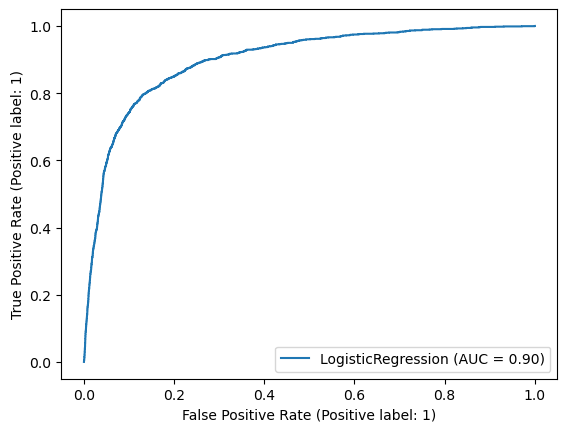

In [412]:
plt.figure(figsize=[2,2])
RocCurveDisplay.from_estimator(lr, X_train_Ft_elm_new_1, y_train_Ft_elm)
plt.show()

In [405]:
#pd.set_option("display.precision", 8)
with pd.option_context('display.float_format', '{:0.5f}'.format):
    print(pd.DataFrame(list(zip(X_train_Ft_elm_new_1.columns, lr.coef_[0])), columns =['Feature Name', 'Coefficient']))
df.head()

                           Feature Name  Coefficient
0                                arpu_7      0.36667
1                                arpu_8      0.26371
2                         roam_ic_mou_7      0.10847
3                         roam_og_mou_6      0.09229
4                         roam_og_mou_7     -0.08775
5                         roam_og_mou_8      0.33718
6                      loc_og_t2t_mou_8     -0.20994
7                      loc_og_t2m_mou_8     -0.39662
8                      loc_og_t2f_mou_6     -0.08799
9                      loc_og_t2f_mou_8      0.07093
10                     std_og_t2t_mou_6      0.10847
11                     std_og_t2t_mou_8     -0.31287
12                     std_og_t2m_mou_8     -0.18364
13                     std_og_t2f_mou_8     -0.05006
14                     loc_ic_t2t_mou_7      0.15139
15                     loc_ic_t2t_mou_8     -0.40822
16                     loc_ic_t2m_mou_6      0.14002
17                     loc_ic_t2m_mou_8     -0

Skewness
og_others_7     130.60
og_others_6     115.36
og_others_8     104.25
isd_og_mou_6     92.02
isd_og_mou_8     91.54

# <font color=red>Business Insights based on churn indicators</font>

### <font color=green>Recall this is a classification problem with classes 0 and 1. It is noticed that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1 i.e., customer will churn, whereas the negative scores indicate a feature that predicts class 0 i.e., customer don't churn</font>

* Telecom company needs to pay attention to the monthly 2g/3g data rates and roaming rates. They need to provide good offers to the customers who are using services from a data and roaming zone.

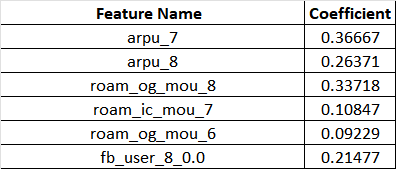

* The company needs to focus on the Operator T2F, T2M and T2C local and STD rates. Also, focus should be on addressing the special outgoing and ISD incoming call rates. Need to provide some kind of packages for customers using services of special outgoing and ISD incoming calls.

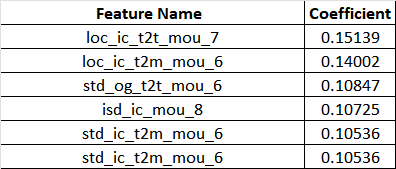

* Inaddition, with increase in number of last mobile recharges from june, july and august months, the chance of customer churning is increasing. Company should focuss on these customers as it can be considered as the potential risk of churning. The telecom company should collects customer query and complaint data and work on their services according to the needs of customers. 
  
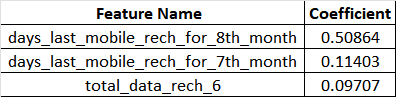